# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### Example 1: 8-Queens Using Pre-Defined Fitness Function

In [210]:
import mlrose_hiive as mh
import numpy as np
import random

weights = [random.randint(1,50) for _ in range(50)]
values =  [random.randint(1,50) for _ in range(50)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)
eval_curves = [] 

def eval_sack(state):
    global eval_curves
    
    fitness = sack_fitness.evaluate(state)
    eval_curves.append(fitness)
    return fitness

custom_fitness = mh.CustomFitness(eval_sack)
problem = mh.DiscreteOpt(length=50, fitness_fn=custom_fitness,  max_val=10, maximize=True)
# I did Simulated Annealing here
print(eval_curves)  # came out as 1046

[]


In [85]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [86]:
# Solve using simulated annealing - attempt 1  
eval_curves = []
#init_state = np.array([1,1,1,0,1,0,0,1,0,0,0,0])
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = None,
                                                      random_state = 42)

In [87]:
print('The best state found is: ', best_state)

The best state found is:  [8 6 7 4 7 9 3 9 8 4 7 7 7 8 5 4 1 7 5 1 4 2 9 9 8 7 9 9 6 5 8 8 4 4 6 4 8
 6 1 5 8 9 9 8 9 4 3 3 8 7]


In [88]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  8809.0


In [89]:
eval_curves

[6557,
 6657,
 6657,
 6645,
 6696,
 6696,
 6777,
 6777,
 6918,
 6918,
 6913,
 7008,
 7008,
 7044,
 7044,
 7032,
 7083,
 7083,
 7077,
 7279,
 7279,
 7239,
 6919,
 7321,
 7321,
 7409,
 7409,
 7066,
 7233,
 7417,
 7417,
 7369,
 7123,
 7375,
 7377,
 7153,
 7367,
 7606,
 7606,
 7594,
 7468,
 7592,
 7682,
 7682,
 7764,
 7764,
 7701,
 7500,
 7814,
 7814,
 7834,
 7834,
 8069,
 8069,
 7853,
 8237,
 8237,
 8559,
 8559,
 8545,
 8557,
 8415,
 8643,
 8643,
 8427,
 8603,
 8795,
 8795,
 8675,
 8774,
 0,
 8579,
 8760,
 8690,
 8531,
 8675,
 0,
 0,
 0,
 8732,
 8543,
 8737,
 8779,
 8603,
 0,
 0,
 8648,
 0,
 8760,
 8648,
 0,
 8774,
 0,
 8809,
 8809,
 0,
 0,
 8804,
 8665,
 0,
 8717,
 0,
 8725,
 8807,
 0,
 8585,
 8805,
 8788,
 8753,
 8768,
 8713,
 8781,
 8808,
 0,
 8533,
 8740,
 0,
 0,
 8793,
 8614,
 0,
 8674,
 8662,
 8569,
 8787,
 8441,
 8725,
 0,
 8621,
 8589,
 8649,
 8593,
 0,
 8803,
 8686,
 0,
 8728,
 8641,
 8501,
 0,
 8721,
 8793,
 8579,
 8807,
 8727,
 0,
 0,
 0,
 8764,
 8769,
 8569,
 0,
 8533,
 8764,


In [64]:
# Solve using simulated annealing - attempt 2
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = None,
                                                      random_state = 1)

In [65]:
print(best_state)

[7 5 3 7 5 0 1 3 9 9 6 2 1 8 5 1 4 9 1 2 0 1 6 4 7 0 2 2 7 9 3 1 3 7 7 5 4
 2 5 6 8 2 1 3 5 3 5 0 7 5]


In [66]:
print(best_fitness)

0.0


### Example 2: 8-Queens Using Custom Fitness Function

In [20]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 
def queens_max(state):
    
    #initialize global call counter 
    global eval_curves
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1
    eval_curves.append(fitness)

    return fitness

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

In [14]:
# Check function is working correctly
state = np.array([1, 4, 1, 3, 5, 5, 2, 7])

# The fitness of this state should be 22
queens_max(state)

22

In [15]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)

In [16]:

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

In [17]:
# Solve using simulated annealing - attempt 1
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 10, max_iters = 1000, 
                                                      init_state = None, random_state = 1)

In [18]:
print(best_state)

[5 3 1 6 4 2 0 7]


In [19]:
print(best_fitness)

27.0


In [20]:
print (len(eval_curves))

295


In [21]:
# Solve using simulated annealing - attempt 2
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, 
                                                      init_state = init_state, random_state = 1)

In [19]:
print(best_state)

[4 1 3 5 7 2 0 6]


In [20]:
print(best_fitness)

28.0


# 8 Queens Greedy Search

In [90]:
  
import mlrose_hiive
from mlrose_hiive.decorators import short_name

from mlrose_hiive.runners._runner_base import _RunnerBase
from mlrose_hiive.runners.rhc_runner import RHCRunner
from mlrose_hiive.runners.sa_runner import SARunner
from mlrose_hiive.runners.ga_runner import GARunner
from mlrose_hiive.runners.mimic_runner import MIMICRunner

In [91]:
random_state = [1,42,  100]

In [211]:
#### RHC
experiment_name = 'example_experiment'

rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='knapsack_rhc.csv',
                seed=100,
                iteration_list=range(100, 2000, 100),
                max_attempts=100,
                restart_list=range(5, 50, 10))   
# the two data frames will contain the results
df_run_stats, df_run_curves = rhc.run()    

Running rhc
*****************
*** Run START ***
*****************
restarts:[5], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[5167.0000]
	[8 8 3 7 7 0 4 2 5 2 2 2 1 0 8 4 0 9 6 2 4 1 5 3 4 4 3 7 1 1 7 7 0 2 9 9 3// 2 5 8 1 0 7 6 2 0 8 2 5 1]...

restarts:[5], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[100], done:[False], time:[0.02], fitness:[8575.0000]
	[9 8 4 7 7 8 6 3 5 2 9 2 3 9 8 6 7 9 8 7 8 1 8 4 8 9 3 7 6 7 7 7 0 5 9 9 9// 2 9 8 9 4 7 6 7 8 8 4 6 6]...

restarts:[5], max_iters:[1900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[47], iteration:[200], done:[False], time:[0.05], fitness:[8625.0000]
	[9 8 4 7 8 8 6 3 5 2 9 2 3 9 8 6 7 9 8 7 8 1 8 5 8 9 3 7 7 7 7 7 0 5 9 9 9// 2 9 8 9 4 7 6 7 8 8 4 7 6]...

restarts:[5], max_iters:[1900], current_restart:[0

runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.14], fitness:[6257.0000]
	[1 1 1 4 4 1 9 0 7 1 7 1 3 9 9 3 5 4 6 3 0 3 5 0 0 4 4 3 4 7 8 3 2 6 1 8 7// 1 0 8 9 3 9 9 7 6 4 9 6 6]...

restarts:[15], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[15], iteration:[100], done:[False], time:[0.15], fitness:[8180.0000]
	[8 8 1 4 4 1 9 5 8 9 9 1 9 9 9 7 5 4 9 6 9 3 9 1 0 8 4 3 7 7 8 3 2 7 8 9 7// 9 6 9 9 3 9 9 7 6 4 9 7 6]...

restarts:[15], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[93], iteration:[200], done:[False], time:[0.18], fitness:[8202.0000]
	[8 8 1 4 4 1 9 5 8 9 9 1 9 9 9 7 5 4 9 6 9 3 9 1 0 8 4 3 7 7 8 3 2 7 8 9 7// 9 6 9 9 3 9 9 7 6 5 9 7 6]...

restarts:[15], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[208], done:[True], time:[0.21

restarts:[15], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.21], fitness:[5061.0000]
	[2 3 2 4 0 3 4 9 8 4 4 9 4 8 8 7 0 0 0 6 3 1 3 8 2 1 9 8 1 5 6 2 5 3 1 7 5// 0 0 2 2 8 4 6 8 3 0 1 5 4]...

restarts:[15], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[8], iteration:[100], done:[False], time:[1.24], fitness:[7636.0000]
	[9 8 9 6 2 3 4 9 9 4 4 9 7 9 8 7 7 7 3 6 7 1 9 8 2 6 9 8 1 5 6 9 5 3 3 7 9// 7 6 2 9 9 8 6 8 5 0 5 5 4]...

restarts:[15], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[193], done:[True], time:[1.30], fitness:[7636.0000]
	[9 8 9 6 2 3 4 9 9 4 4 9 7 9 8 7 7 7 3 6 7 1 9 8 2 6 9 8 1 5 6 9 5 3 3 7 9// 7 6 2 9 9 8 6 8 5 0 5 5 4]...

restarts:[15], max_iters:[1900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment],

restarts:[25], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[25], iteration:[200], done:[False], time:[0.55], fitness:[8262.0000]
	[5 3 9 7 2 7 6 7 7 9 4 7 9 4 5 0 4 9 8 9 3 9 2 3 9 5 0 9 4 9 9 2 7 8 2 7 9// 5 9 6 9 5 8 9 4 9 2 9 3 6]...

restarts:[25], max_iters:[1900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[276], done:[True], time:[0.61], fitness:[8262.0000]
	[5 3 9 7 2 7 6 7 7 9 4 7 9 4 5 0 4 9 8 9 3 9 2 3 9 5 0 9 4 9 9 2 7 8 2 7 9// 5 9 6 9 5 8 9 4 9 2 9 3 6]...

restarts:[25], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.68], fitness:[5166.0000]
	[2 2 7 1 6 1 7 1 5 3 6 1 8 1 6 0 1 5 4 4 8 7 3 9 1 1 1 1 8 2 2 8 8 7 4 7 6// 6 9 1 6 0 5 7 2 5 3 9 1 3]...

restarts:[25], max_iters:[1900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], at

restarts:[25], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.45], fitness:[5974.0000]
	[1 7 7 5 5 0 2 9 3 9 3 0 8 0 2 5 9 0 7 6 8 3 1 2 2 0 0 9 3 2 2 5 8 9 4 6 8// 4 9 7 0 9 1 8 2 7 3 7 4 9]...

restarts:[25], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[46], iteration:[100], done:[False], time:[2.47], fitness:[7616.0000]
	[1 7 7 7 5 0 2 9 5 9 3 8 9 0 9 9 9 0 7 6 8 6 9 2 2 0 0 9 3 2 2 8 8 9 8 6 8// 4 9 7 0 9 9 8 2 8 8 7 4 9]...

restarts:[25], max_iters:[1900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[155], done:[True], time:[2.57], fitness:[7616.0000]
	[1 7 7 7 5 0 2 9 5 9 3 8 9 0 9 9 9 0 7 6 8 6 9 2 2 0 0 9 3 2 2 8 8 9 8 6 8// 4 9 7 0 9 9 8 2 8 8 7 4 9]...

restarts:[25], max_iters:[1900], current_restart:[13]
runner_name:[rhc], experiment_name:[example_experiment]

restarts:[25], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[27], iteration:[200], done:[False], time:[4.87], fitness:[8042.0000]
	[3 5 6 6 7 6 8 4 8 7 9 6 9 9 9 8 0 9 0 5 8 6 1 6 6 3 8 5 8 7 8 5 4 9 9 9 6// 9 4 4 9 6 8 0 8 8 0 8 5 8]...

restarts:[25], max_iters:[1900], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[274], done:[True], time:[5.00], fitness:[8042.0000]
	[3 5 6 6 7 6 8 4 8 7 9 6 9 9 9 8 0 9 0 5 8 6 1 6 6 3 8 5 8 7 8 5 4 9 9 9 6// 9 4 4 9 6 8 0 8 8 0 8 5 8]...

restarts:[25], max_iters:[1900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.11], fitness:[6120.0000]
	[1 6 8 2 7 5 5 3 8 7 8 6 8 8 0 1 2 0 3 3 8 5 9 6 4 7 3 0 0 1 6 0 4 9 1 6 2// 2 5 6 5 8 4 4 2 3 8 3 3 9]...

restarts:[25], max_iters:[1900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment]

restarts:[35], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.51], fitness:[6257.0000]
	[1 1 1 4 4 1 9 0 7 1 7 1 3 9 9 3 5 4 6 3 0 3 5 0 0 4 4 3 4 7 8 3 2 6 1 8 7// 1 0 8 9 3 9 9 7 6 4 9 6 6]...

restarts:[35], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[15], iteration:[100], done:[False], time:[0.53], fitness:[8180.0000]
	[8 8 1 4 4 1 9 5 8 9 9 1 9 9 9 7 5 4 9 6 9 3 9 1 0 8 4 3 7 7 8 3 2 7 8 9 7// 9 6 9 9 3 9 9 7 6 4 9 7 6]...

restarts:[35], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[93], iteration:[200], done:[False], time:[0.66], fitness:[8202.0000]
	[8 8 1 4 4 1 9 5 8 9 9 1 9 9 9 7 5 4 9 6 9 3 9 1 0 8 4 3 7 7 8 3 2 7 8 9 7// 9 6 9 9 3 9 9 7 6 5 9 7 6]...

restarts:[35], max_iters:[1900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], at

restarts:[35], max_iters:[1900], current_restart:[9]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[269], done:[True], time:[3.29], fitness:[8607.0000]
	[8 6 8 9 7 7 9 9 6 9 9 5 8 8 1 1 9 5 5 9 8 9 9 8 1 8 7 0 5 8 6 2 4 7 4 9 7// 3 9 8 4 5 5 8 9 7 3 3 5 8]...

restarts:[35], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.43], fitness:[5061.0000]
	[2 3 2 4 0 3 4 9 8 4 4 9 4 8 8 7 0 0 0 6 3 1 3 8 2 1 9 8 1 5 6 2 5 3 1 7 5// 0 0 2 2 8 4 6 8 3 0 1 5 4]...

restarts:[35], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[8], iteration:[100], done:[False], time:[3.45], fitness:[7636.0000]
	[9 8 9 6 2 3 4 9 9 4 4 9 7 9 8 7 7 7 3 6 7 1 9 8 2 6 9 8 1 5 6 9 5 3 3 7 9// 7 6 2 9 9 8 6 8 5 0 5 5 4]...

restarts:[35], max_iters:[1900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], 

restarts:[35], max_iters:[1900], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[180], done:[True], time:[6.76], fitness:[7864.0000]
	[9 9 9 7 9 1 3 7 7 2 9 3 4 8 4 2 9 9 9 5 6 6 9 7 6 1 8 1 6 7 6 4 9 4 1 8 9// 9 7 5 5 7 0 7 6 8 6 8 6 9]...

restarts:[35], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.91], fitness:[6292.0000]
	[3 5 7 7 4 6 2 2 4 7 9 3 1 9 5 5 9 5 3 9 2 1 9 9 9 6 7 4 0 7 8 1 7 9 8 8 6// 5 5 0 7 0 2 2 0 1 2 4 7 4]...

restarts:[35], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[15], iteration:[100], done:[False], time:[6.94], fitness:[7697.0000]
	[3 9 8 8 8 7 6 2 4 7 9 3 1 9 8 5 9 8 3 9 9 1 9 9 9 6 7 4 2 7 8 9 7 9 8 8 6// 5 8 9 8 0 2 2 0 1 2 4 7 4]...

restarts:[35], max_iters:[1900], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment]

restarts:[35], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[10.82], fitness:[5123.0000]
	[9 9 6 2 4 2 0 2 2 9 3 8 6 7 1 8 3 6 4 6 2 3 2 1 8 2 5 5 2 7 2 1 5 7 2 2 1// 2 4 3 8 0 4 0 0 3 7 8 2 1]...

restarts:[35], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[100], done:[False], time:[10.86], fitness:[8276.0000]
	[9 9 8 5 8 3 9 9 2 9 9 8 8 8 5 8 6 6 7 6 7 3 5 6 8 2 5 8 4 7 2 9 5 9 8 7 1// 2 4 3 8 5 4 6 5 5 8 8 7 4]...

restarts:[35], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[62], iteration:[200], done:[False], time:[11.04], fitness:[8376.0000]
	[9 9 8 5 8 3 9 9 2 9 9 8 8 8 5 8 6 6 7 6 7 3 5 6 8 2 5 8 4 7 2 9 5 9 8 7 2// 2 5 3 8 5 4 6 7 5 8 8 8 4]...

restarts:[35], max_iters:[1900], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experimen

restarts:[35], max_iters:[1900], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[193], done:[True], time:[15.44], fitness:[7977.0000]
	[8 2 7 8 8 1 5 4 3 4 6 7 9 4 2 7 1 2 8 6 4 9 2 2 7 5 8 7 8 7 8 8 8 8 9 5 4// 7 1 5 1 9 3 9 9 6 7 9 2 3]...

restarts:[35], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[15.60], fitness:[5923.0000]
	[4 1 6 7 4 7 2 0 9 9 8 0 6 9 2 5 0 7 1 5 2 7 2 5 7 4 8 2 0 0 4 4 9 4 0 2 7// 1 9 0 1 5 8 7 3 5 5 6 1 4]...

restarts:[35], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[53], iteration:[100], done:[False], time:[15.65], fitness:[8042.0000]
	[5 7 6 7 4 7 9 0 9 9 8 6 6 9 8 5 9 7 1 9 2 7 2 5 7 4 8 2 6 8 4 4 9 8 0 3 7// 1 9 8 1 5 8 7 7 8 5 6 3 8]...

restarts:[35], max_iters:[1900], current_restart:[34]
runner_name:[rhc], experiment_name:[example_experime

restarts:[45], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.26], fitness:[6395.0000]
	[7 8 1 2 4 2 1 0 8 2 9 8 5 6 9 5 0 9 7 5 8 8 3 2 6 8 0 2 9 2 9 8 4 8 6 8 2// 7 6 9 0 4 3 3 9 4 5 1 9 2]...

restarts:[45], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[100], done:[False], time:[3.28], fitness:[7512.0000]
	[7 9 1 2 4 2 1 8 8 3 9 8 8 6 9 6 3 9 7 5 8 8 3 6 7 8 4 7 9 2 9 8 8 8 7 8 4// 7 6 9 4 4 3 3 9 9 5 1 9 3]...

restarts:[45], max_iters:[1900], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[199], done:[True], time:[3.50], fitness:[7512.0000]
	[7 9 1 2 4 2 1 8 8 3 9 8 8 6 9 6 3 9 7 5 8 8 3 6 7 8 4 7 9 2 9 8 8 8 7 8 4// 7 6 9 4 4 3 3 9 9 5 1 9 3]...

restarts:[45], max_iters:[1900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], att

restarts:[45], max_iters:[1900], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[201], done:[True], time:[7.77], fitness:[7365.0000]
	[8 6 8 6 6 0 1 4 6 8 2 0 0 6 0 7 8 7 8 6 6 8 7 6 7 4 8 1 0 0 9 9 8 8 6 4 6// 7 4 0 6 6 9 2 9 9 8 9 9 8]...

restarts:[45], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.00], fitness:[5834.0000]
	[8 6 9 1 6 9 0 8 4 6 5 2 6 5 7 6 4 2 2 8 8 6 8 3 7 2 4 2 1 2 9 0 2 5 3 3 3// 4 0 1 4 1 7 9 8 3 0 0 4 1]...

restarts:[45], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[38], iteration:[100], done:[False], time:[8.02], fitness:[8008.0000]
	[8 6 9 1 6 9 5 8 4 6 8 2 6 5 7 7 4 2 2 8 8 6 8 9 7 2 9 2 1 6 9 9 5 5 9 3 3// 9 9 9 7 9 7 9 8 7 3 0 9 1]...

restarts:[45], max_iters:[1900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment]

restarts:[45], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[73], iteration:[200], done:[False], time:[13.15], fitness:[8219.0000]
	[5 3 9 9 9 6 9 7 2 2 9 6 9 8 7 9 3 9 1 7 9 8 5 3 6 4 4 8 8 3 5 8 7 7 5 9 2// 4 6 8 6 7 7 6 5 4 4 8 9 3]...

restarts:[45], max_iters:[1900], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[228], done:[True], time:[13.43], fitness:[8219.0000]
	[5 3 9 9 9 6 9 7 2 2 9 6 9 8 7 9 3 9 1 7 9 8 5 3 6 4 4 8 8 3 5 8 7 7 5 9 2// 4 6 8 6 7 7 6 5 4 4 8 9 3]...

restarts:[45], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[13.70], fitness:[5224.0000]
	[1 3 9 2 1 0 8 9 6 1 9 7 2 0 1 3 9 2 1 1 8 3 6 6 1 5 8 4 8 2 1 1 4 3 4 9 1// 7 2 3 5 6 0 5 7 9 0 6 2 9]...

restarts:[45], max_iters:[1900], current_restart:[23]
runner_name:[rhc], experiment_name:[example_experime

restarts:[45], max_iters:[1900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[190], done:[True], time:[19.18], fitness:[7876.0000]
	[7 9 7 9 3 8 0 8 7 7 3 8 7 8 0 8 5 7 8 6 5 5 8 8 0 9 9 9 8 4 7 3 5 6 2 9 9// 7 5 9 5 3 7 2 9 5 7 3 4 8]...

restarts:[45], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[19.44], fitness:[6620.0000]
	[3 8 8 7 7 4 2 4 2 2 5 8 5 1 1 5 6 2 4 4 4 8 6 8 5 3 2 7 8 7 3 7 5 3 9 6 1// 3 4 2 4 9 7 3 6 2 9 8 8 8]...

restarts:[45], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[33], iteration:[100], done:[False], time:[19.50], fitness:[8138.0000]
	[3 8 8 7 7 5 2 8 2 2 9 9 8 3 2 5 6 7 7 4 4 8 6 8 7 3 4 7 8 7 6 8 5 3 9 6 1// 3 4 7 4 9 7 8 8 2 9 8 9 8]...

restarts:[45], max_iters:[1900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experime

restarts:[45], max_iters:[1900], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[131], done:[True], time:[25.31], fitness:[7790.0000]
	[9 1 4 4 8 9 5 7 9 7 6 8 7 2 4 9 4 0 9 8 0 8 8 5 9 9 6 7 8 1 9 4 3 4 2 9 4// 1 9 9 6 0 3 3 6 4 4 2 9 9]...

restarts:[45], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[25.58], fitness:[6162.0000]
	[5 9 7 1 7 9 8 7 4 1 4 2 2 7 4 5 0 4 5 0 5 3 7 3 6 4 0 3 7 0 1 8 4 0 6 6 1// 9 0 9 6 7 3 9 1 1 2 5 5 9]...

restarts:[45], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[100], done:[False], time:[25.66], fitness:[8241.0000]
	[5 9 7 1 9 9 8 7 4 1 9 9 4 8 4 7 4 4 5 6 5 9 9 3 6 5 0 4 8 9 7 8 7 3 6 6 1// 9 8 9 6 7 3 9 4 5 2 8 9 9]...

restarts:[45], max_iters:[1900], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experimen

***************
*** Run END ***
***************
Run time: 58.71593409999332
Saving: [knapsack_rhc.csv\example_experiment\rhc__example_experiment__run_stats_df.csv]
Saving: [knapsack_rhc.csv\example_experiment\rhc__example_experiment__curves_df.csv]


In [215]:
df_run_stats.to_csv('knapsack_rhc2.csv', index=False)

In [93]:
def avg_rhc_runner(random_state):
    
    rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=0,
                iteration_list=[1000],
                max_attempts=100,
                restart_list=[0, 5, 10, 100]) 
    df_run_stats, _ = rhc.run()
    df_run_stats['seed'] = 0
    for i in random_state:
        rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=i,
                iteration_list=[1000],
                max_attempts=100,
                restart_list=[0, 5, 10, 100]) 
        
        
        df_run_stats_local, _ = rhc.run()
        df_run_stats_local['seed'] = i 
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats
    

In [94]:
agg = avg_rhc_runner([1,42,100])

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[5627.0000]
	[5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3// 7 0 1 9 9 0 4 7 3 2 7 2 0]...

restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[183], done:[True], time:[0.02], fitness:[7971.0000]
	[7 2 4 5 7 9 5 5 2 8 7 9 8 9 4 7 9 7 8 9 5 9 8 9 4 3 3 3 5 6 3 7 8 1 3 8 7// 7 8 6 9 9 0 9 9 7 2 7 4 6]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[5], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[5627.0000]
	[5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5

restarts:[10], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.46], fitness:[5600.0000]
	[5 8 2 9 4 9 6 1 2 6 2 0 0 6 9 6 2 3 2 0 9 6 1 4 4 2 5 2 3 2 3 8 2 4 7 3 3// 3 6 2 5 8 7 3 3 7 2 2 0 7]...

restarts:[10], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[350], done:[True], time:[0.54], fitness:[7968.0000]
	[5 9 6 9 4 9 6 7 2 8 6 0 5 9 9 7 2 3 6 9 9 8 7 4 4 8 5 9 8 5 7 8 8 4 8 3 3// 8 8 2 8 8 7 3 7 7 2 5 9 7]...

restarts:[10], max_iters:[1000], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.58], fitness:[6303.0000]
	[8 8 3 2 1 4 7 6 8 0 1 1 3 7 8 4 6 2 6 9 0 0 2 9 9 0 5 0 4 7 7 1 8 6 5 1 5// 4 2 6 1 1 7 9 5 4 1 5 7 8]...

restarts:[10], max_iters:[1000], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attem

restarts:[100], max_iters:[1000], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[318], done:[True], time:[1.01], fitness:[8790.0000]
	[9 9 6 6 9 7 9 7 9 8 4 9 9 7 3 6 6 1 8 5 2 9 7 6 6 6 9 7 2 8 9 9 9 0 9 9 4// 5 7 3 8 9 7 0 8 8 3 9 9 7]...

restarts:[100], max_iters:[1000], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.08], fitness:[6414.0000]
	[9 3 5 0 3 0 8 4 8 3 0 9 6 3 3 0 6 5 2 5 1 1 8 9 4 0 9 8 4 7 5 7 4 3 1 9 1// 8 0 6 5 6 0 4 6 4 1 0 9 4]...

restarts:[100], max_iters:[1000], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[194], done:[True], time:[1.12], fitness:[9233.0000]
	[9 9 5 9 7 1 8 4 9 8 0 9 9 8 7 2 8 9 9 7 6 9 8 9 6 7 9 8 4 7 5 7 4 3 7 9 8// 8 1 9 6 6 8 8 8 6 4 1 9 4]...

restarts:[100], max_iters:[1000], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.53], fitness:[6037.0000]
	[3 9 0 4 0 8 6 4 0 8 3 4 1 4 1 3 4 0 3 6 5 8 4 3 6 1 8 6 8 4 9 6 7 4 3 4 7// 8 8 3 3 4 7 6 8 2 6 0 5 3]...

restarts:[100], max_iters:[1000], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[225], done:[True], time:[3.64], fitness:[8226.0000]
	[3 9 3 4 3 8 6 4 7 8 3 5 3 7 3 3 7 9 3 6 5 9 4 3 9 1 8 6 8 6 9 9 8 4 8 9 7// 8 8 8 4 8 7 6 8 8 6 6 5 6]...

restarts:[100], max_iters:[1000], current_restart:[27]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.75], fitness:[6345.0000]
	[9 4 7 0 4 6 6 8 7 7 6 5 0 7 0 7 3 1 8 5 6 4 6 7 0 0 4 7 3 6 2 5 4 7 5 9 3// 3 4 1 6 3 0 8 0 0 6 2 2 9]...

restarts:[100], max_iters:[1000], current_restart:[27]
runner_name:[rhc], experiment_name:[example_experiment

restarts:[100], max_iters:[1000], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[7.99], fitness:[5174.0000]
	[1 4 4 2 4 6 3 2 4 4 2 0 8 2 9 0 0 5 5 8 8 8 8 3 1 4 8 3 0 4 6 2 6 4 5 2 2// 1 0 5 4 8 0 2 0 3 8 6 9 9]...

restarts:[100], max_iters:[1000], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[172], done:[True], time:[8.17], fitness:[7562.0000]
	[1 4 4 2 5 7 3 3 7 4 2 0 8 8 9 0 8 5 6 8 8 8 8 4 6 6 8 5 8 7 6 6 6 8 5 5 9// 1 3 6 4 8 7 8 7 3 8 6 9 9]...

restarts:[100], max_iters:[1000], current_restart:[41]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.38], fitness:[5868.0000]
	[7 1 7 7 3 5 5 0 8 6 7 5 9 3 1 0 6 5 5 1 5 3 5 7 0 6 5 7 4 2 6 4 7 0 4 5 0// 2 3 6 7 1 5 1 5 5 4 7 5 0]...

restarts:[100], max_iters:[1000], current_restart:[41]
runner_name:[rhc], experiment_name:[example_experiment

restarts:[100], max_iters:[1000], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[13.98], fitness:[6688.0000]
	[5 2 8 9 7 3 4 1 6 1 9 4 1 5 3 1 2 8 5 3 6 9 3 5 2 3 6 9 6 0 5 4 3 1 0 6 9// 9 7 7 7 3 8 1 7 6 8 4 8 9]...

restarts:[100], max_iters:[1000], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[153], done:[True], time:[14.14], fitness:[8223.0000]
	[8 8 8 9 9 3 9 1 6 5 9 5 2 5 3 1 2 8 5 3 6 9 3 5 9 6 6 9 6 0 9 4 4 6 3 6 9// 9 7 7 7 3 8 1 7 6 9 8 8 9]...

restarts:[100], max_iters:[1000], current_restart:[55]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[14.35], fitness:[5363.0000]
	[3 2 3 2 2 0 1 0 4 3 2 6 4 1 2 2 3 5 5 1 3 5 8 1 7 3 2 8 1 9 8 0 1 7 5 2 7// 7 3 6 8 1 4 0 2 2 8 8 4 8]...

restarts:[100], max_iters:[1000], current_restart:[55]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[68]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[151], done:[True], time:[20.12], fitness:[7725.0000]
	[9 9 6 7 9 9 3 5 9 9 8 4 4 9 9 2 2 2 7 4 7 7 9 5 6 2 6 7 5 7 5 3 7 9 0 9 5// 2 3 2 7 1 9 7 8 7 1 7 1 2]...

restarts:[100], max_iters:[1000], current_restart:[69]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[20.28], fitness:[5771.0000]
	[9 2 0 7 9 2 4 9 6 3 4 6 1 4 8 0 9 6 2 5 0 2 3 1 1 4 7 1 7 6 0 6 2 2 6 2 0// 5 4 1 4 2 9 5 0 9 6 9 7 2]...

restarts:[100], max_iters:[1000], current_restart:[69]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[326], done:[True], time:[20.58], fitness:[8456.0000]
	[9 5 9 9 9 2 6 9 6 9 8 6 1 8 8 6 9 6 2 5 1 6 6 9 1 8 7 9 7 6 5 6 8 3 7 2 8// 5 4 1 6 7 9 5 0 9 6 9 7 8]...

restarts:[100], max_iters:[1000], current_restart:[70]
runner_name:[rhc], experiment_name:[example_expe

restarts:[100], max_iters:[1000], current_restart:[82]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[263], done:[True], time:[27.32], fitness:[9066.0000]
	[7 5 9 8 7 0 8 8 8 8 6 8 6 9 7 9 7 7 0 7 7 8 1 7 9 8 2 7 7 6 8 9 5 7 9 4 9// 7 2 7 6 4 8 6 9 4 2 5 5 5]...

restarts:[100], max_iters:[1000], current_restart:[83]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[27.54], fitness:[6428.0000]
	[6 7 1 2 8 0 6 9 7 9 4 4 9 4 9 7 3 5 6 7 5 0 4 0 1 4 5 8 9 1 1 9 0 1 9 7 6// 8 1 5 0 1 6 9 1 9 5 1 4 9]...

restarts:[100], max_iters:[1000], current_restart:[83]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[182], done:[True], time:[27.80], fitness:[8339.0000]
	[6 7 9 5 8 0 9 9 7 9 4 4 9 8 9 7 3 5 6 7 5 9 4 7 1 6 6 8 9 1 1 9 2 1 9 9 8// 8 2 6 0 8 6 9 8 9 5 1 9 9]...

restarts:[100], max_iters:[1000], current_restart:[84]
runner_name:[rhc], experiment_name:[example_expe

restarts:[100], max_iters:[1000], current_restart:[96]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[177], done:[True], time:[35.06], fitness:[8326.0000]
	[7 9 7 0 8 6 4 7 8 1 8 9 7 8 8 9 3 3 5 9 9 6 3 3 7 2 5 8 9 6 9 8 9 0 9 6 8// 4 8 7 9 9 9 0 0 4 6 8 8 8]...

restarts:[100], max_iters:[1000], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[35.30], fitness:[6471.0000]
	[8 3 2 5 1 3 6 9 6 3 8 0 2 5 6 3 6 1 2 8 8 5 2 3 2 6 6 8 5 5 7 1 0 2 8 6 9// 1 7 1 2 8 8 1 8 6 0 7 3 9]...

restarts:[100], max_iters:[1000], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[209], done:[True], time:[35.60], fitness:[7998.0000]
	[8 3 2 9 1 3 9 9 6 4 8 2 6 8 6 7 6 5 2 8 8 6 9 3 3 6 9 8 5 6 7 5 8 8 8 8 9// 2 7 1 2 8 8 6 8 9 0 7 8 9]...

restarts:[100], max_iters:[1000], current_restart:[98]
runner_name:[rhc], experiment_name:[example_expe

restarts:[10], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[180], done:[True], time:[0.07], fitness:[8227.0000]
	[9 8 6 0 1 7 2 7 7 4 6 0 4 4 8 6 6 2 5 4 3 4 6 7 1 9 6 7 3 9 8 8 9 8 1 7 6// 4 9 6 9 5 8 9 4 9 9 9 7 4]...

restarts:[10], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.10], fitness:[5832.0000]
	[9 8 3 5 2 0 7 9 8 1 4 6 1 6 9 3 4 3 7 3 8 3 4 4 4 6 3 0 4 6 4 9 3 0 6 2 9// 2 9 0 1 2 4 6 0 6 0 0 2 6]...

restarts:[10], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[167], done:[True], time:[0.12], fitness:[8709.0000]
	[9 8 4 5 6 0 7 9 8 5 9 6 1 6 9 3 8 3 7 8 8 9 9 4 5 6 4 2 4 8 9 9 9 8 8 8 9// 9 9 4 8 4 4 7 0 6 6 8 9 6]...

restarts:[10], max_iters:[1000], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], at

restarts:[100], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.42], fitness:[7062.0000]
	[5 7 1 2 6 8 4 0 2 8 5 4 7 9 6 8 9 4 8 9 1 2 7 3 8 6 1 6 1 9 9 7 5 8 7 1 7// 5 9 1 0 2 8 7 7 6 4 0 7 5]...

restarts:[100], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[176], done:[True], time:[0.46], fitness:[8069.0000]
	[8 8 5 9 9 8 4 0 2 8 5 4 7 9 6 9 9 4 8 9 8 7 8 3 8 6 1 9 1 9 9 8 9 8 7 1 7// 5 9 1 3 2 8 7 7 6 4 4 7 5]...

restarts:[100], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.51], fitness:[5996.0000]
	[8 1 3 3 0 0 0 4 6 6 3 4 9 6 7 8 7 3 3 1 2 2 3 5 7 0 1 5 5 7 9 2 7 8 6 3 2// 5 9 2 6 5 4 6 9 6 0 9 3 1]...

restarts:[100], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], a

restarts:[100], max_iters:[1000], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.12], fitness:[5464.0000]
	[0 7 2 7 0 6 5 1 6 7 3 1 8 0 1 7 5 3 8 3 4 8 5 5 9 4 9 7 2 6 0 8 3 3 0 7 5// 6 2 5 8 0 5 8 0 9 0 4 3 1]...

restarts:[100], max_iters:[1000], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[227], done:[True], time:[2.19], fitness:[7773.0000]
	[4 8 4 7 1 6 5 5 8 7 9 4 8 0 1 9 8 3 8 3 9 8 7 5 9 7 9 8 5 6 7 9 3 6 0 7 8// 6 9 6 8 1 5 8 8 9 1 8 9 4]...

restarts:[100], max_iters:[1000], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.28], fitness:[5880.0000]
	[8 7 5 6 7 0 8 3 5 1 8 8 4 2 1 7 5 6 8 3 3 9 5 4 3 8 0 1 4 0 6 1 4 4 5 0 8// 6 7 8 3 5 0 0 8 6 0 3 9 0]...

restarts:[100], max_iters:[1000], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment

restarts:[100], max_iters:[1000], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.06], fitness:[6540.0000]
	[9 1 2 0 9 7 8 1 6 4 7 9 3 5 3 5 1 4 2 5 8 0 1 0 9 6 8 7 2 4 7 8 5 9 1 0 4// 8 9 7 6 0 1 7 6 7 1 8 0 7]...

restarts:[100], max_iters:[1000], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[145], done:[True], time:[5.16], fitness:[7556.0000]
	[9 1 2 8 9 7 8 1 6 4 7 9 3 5 3 5 5 4 2 5 9 5 1 0 9 6 9 7 4 4 7 8 5 9 1 8 4// 8 9 7 6 0 9 7 6 7 3 8 0 7]...

restarts:[100], max_iters:[1000], current_restart:[34]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.29], fitness:[5051.0000]
	[3 4 0 9 8 0 2 1 4 2 0 4 0 8 1 5 3 7 2 3 3 6 7 5 5 5 5 9 2 0 7 7 2 7 7 0 3// 4 5 2 9 0 4 3 6 3 0 8 4 2]...

restarts:[100], max_iters:[1000], current_restart:[34]
runner_name:[rhc], experiment_name:[example_experiment

restarts:[100], max_iters:[1000], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[238], done:[True], time:[9.33], fitness:[8608.0000]
	[0 9 4 9 9 3 7 2 9 2 8 6 9 9 7 4 6 4 4 5 7 9 2 5 3 8 7 9 7 9 8 6 8 8 7 7 9// 5 3 7 9 8 7 7 6 0 5 8 9 5]...

restarts:[100], max_iters:[1000], current_restart:[48]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.49], fitness:[7048.0000]
	[5 1 2 3 8 0 5 1 7 7 9 9 8 7 0 1 4 5 8 4 9 4 1 2 2 6 1 8 4 1 9 6 4 9 9 5 1// 8 3 4 5 7 5 8 9 7 5 4 4 7]...

restarts:[100], max_iters:[1000], current_restart:[48]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[192], done:[True], time:[9.63], fitness:[8405.0000]
	[5 2 9 3 8 0 5 4 7 7 9 9 8 7 0 1 5 5 9 6 9 4 1 6 3 8 1 9 6 3 9 6 7 9 9 6 5// 8 8 8 6 7 5 9 9 7 5 4 4 7]...

restarts:[100], max_iters:[1000], current_restart:[49]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[61]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[159], done:[True], time:[14.48], fitness:[7839.0000]
	[0 8 8 8 4 6 7 7 1 9 7 6 7 7 2 9 4 4 9 0 2 0 8 9 6 7 7 7 7 5 0 5 8 7 7 4 8// 4 9 7 5 8 6 6 8 7 3 8 8 8]...

restarts:[100], max_iters:[1000], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[14.70], fitness:[5250.0000]
	[8 3 2 8 6 1 1 2 3 0 0 8 6 8 9 8 0 9 8 1 0 2 9 5 4 3 3 5 3 2 9 4 4 5 1 6 0// 9 1 3 6 0 1 5 3 0 0 9 7 9]...

restarts:[100], max_iters:[1000], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[300], done:[True], time:[15.01], fitness:[7623.0000]
	[8 4 7 8 9 1 1 4 3 0 0 8 8 8 9 8 8 9 8 2 8 7 9 5 5 3 5 5 7 2 9 4 4 8 8 6 4// 9 1 3 6 4 8 8 8 7 4 9 9 9]...

restarts:[100], max_iters:[1000], current_restart:[63]
runner_name:[rhc], experiment_name:[example_expe

restarts:[100], max_iters:[1000], current_restart:[75]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[174], done:[True], time:[20.46], fitness:[8487.0000]
	[2 1 9 9 5 8 9 9 5 5 7 8 9 8 6 9 6 6 4 8 8 1 3 7 7 1 4 5 8 6 9 7 9 3 8 8 7// 6 0 9 5 8 8 6 5 8 2 7 7 0]...

restarts:[100], max_iters:[1000], current_restart:[76]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[20.64], fitness:[6835.0000]
	[6 2 8 1 4 9 6 7 3 8 0 1 5 3 9 8 5 0 0 4 3 4 9 4 2 6 7 9 8 4 7 5 1 6 9 9 1// 9 0 4 8 2 5 4 8 1 2 3 9 4]...

restarts:[100], max_iters:[1000], current_restart:[76]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[177], done:[True], time:[20.87], fitness:[8269.0000]
	[8 4 8 1 4 9 6 9 5 8 8 1 5 8 9 8 5 1 0 4 5 4 9 4 2 9 7 9 9 4 8 8 4 6 9 9 6// 9 9 4 8 2 9 5 8 3 2 4 9 4]...

restarts:[100], max_iters:[1000], current_restart:[77]
runner_name:[rhc], experiment_name:[example_expe

restarts:[100], max_iters:[1000], current_restart:[89]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[130], done:[True], time:[28.63], fitness:[7283.0000]
	[8 1 6 5 3 7 2 8 5 6 9 4 5 8 0 8 5 8 9 3 6 5 5 0 8 7 7 1 5 9 0 0 6 6 9 5 1// 8 8 7 6 6 5 9 9 9 4 9 6 6]...

restarts:[100], max_iters:[1000], current_restart:[90]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[28.89], fitness:[6170.0000]
	[2 4 5 8 3 8 7 6 2 0 7 7 9 2 0 5 9 8 1 5 4 7 1 6 1 4 8 1 1 7 0 2 2 7 2 0 4// 9 4 8 8 6 2 6 3 8 2 2 8 4]...

restarts:[100], max_iters:[1000], current_restart:[90]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[236], done:[True], time:[29.57], fitness:[8336.0000]
	[6 9 5 8 5 8 8 6 5 2 9 7 9 9 0 7 9 8 3 5 5 8 9 7 4 4 8 8 7 7 5 2 2 7 6 7 7// 9 4 8 8 6 8 6 3 8 2 2 8 4]...

restarts:[100], max_iters:[1000], current_restart:[91]
runner_name:[rhc], experiment_name:[example_expe

restarts:[5], max_iters:[1000], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.13], fitness:[6208.0000]
	[4 4 1 7 7 0 7 4 1 1 5 8 0 5 8 7 5 2 7 8 0 8 5 5 3 0 9 7 1 0 1 0 0 8 0 3 9// 5 6 1 5 6 9 9 1 1 9 6 0 7]...

restarts:[5], max_iters:[1000], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[163], done:[True], time:[0.16], fitness:[8137.0000]
	[4 4 1 7 7 9 7 4 1 1 5 9 0 9 8 7 5 2 7 8 0 8 5 5 3 3 9 7 7 5 8 9 0 8 8 3 9// 5 9 1 5 6 9 9 8 4 9 6 3 8]...

restarts:[5], max_iters:[1000], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.18], fitness:[6520.0000]
	[7 0 9 9 7 3 3 3 5 6 5 0 7 9 6 5 5 4 5 8 9 8 9 7 9 8 9 7 7 0 9 4 3 1 7 2 3// 6 9 8 1 2 3 9 0 6 1 4 0 2]...

restarts:[5], max_iters:[1000], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[

restarts:[100], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[349], done:[True], time:[0.04], fitness:[8717.0000]
	[9 7 7 7 6 9 2 6 9 4 3 7 9 8 6 4 8 7 5 1 4 3 9 9 8 7 9 2 6 7 8 8 7 2 7 4 8// 6 1 5 8 9 9 8 9 4 5 3 8 7]...

restarts:[100], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.13], fitness:[6623.0000]
	[7 3 7 3 7 8 2 2 1 9 2 2 4 4 1 9 5 4 5 0 4 8 9 1 0 9 8 9 8 8 5 7 0 9 3 0 7// 0 2 3 7 5 9 6 7 1 9 7 2 6]...

restarts:[100], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[160], done:[True], time:[0.16], fitness:[8182.0000]
	[7 4 7 3 7 8 2 2 8 9 2 2 4 5 9 9 7 4 5 0 4 9 9 6 4 9 8 9 8 8 8 7 5 9 3 0 9// 3 2 3 7 9 9 6 7 2 9 7 8 6]...

restarts:[100], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment]

restarts:[100], max_iters:[1000], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.85], fitness:[5955.0000]
	[8 8 7 2 2 1 4 3 6 3 8 1 5 6 3 5 6 3 7 8 0 6 8 9 4 1 9 5 6 1 1 9 9 0 3 6 8// 2 6 6 6 1 5 1 5 9 2 1 5 1]...

restarts:[100], max_iters:[1000], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[175], done:[True], time:[1.91], fitness:[8044.0000]
	[8 8 8 2 9 3 8 3 6 7 8 8 9 6 3 9 6 3 7 8 8 6 8 9 4 1 9 6 6 1 2 9 9 0 8 6 8// 5 7 6 6 1 5 9 8 9 7 6 5 1]...

restarts:[100], max_iters:[1000], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.02], fitness:[4979.0000]
	[0 9 0 4 1 8 6 3 3 1 4 3 0 7 2 5 3 8 6 8 9 2 0 4 2 5 7 3 4 4 3 3 3 3 3 4 1// 1 8 1 5 1 4 3 6 6 5 9 4 0]...

restarts:[100], max_iters:[1000], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment

restarts:[100], max_iters:[1000], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.62], fitness:[5476.0000]
	[2 3 8 8 1 4 0 3 1 7 3 4 3 4 4 4 2 6 2 1 2 2 7 3 2 9 4 3 8 7 6 7 4 3 6 0 5// 7 6 1 6 5 4 3 0 1 6 9 2 4]...

restarts:[100], max_iters:[1000], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[192], done:[True], time:[4.72], fitness:[8298.0000]
	[9 9 8 8 6 4 0 3 2 7 6 4 6 4 8 4 4 8 6 5 5 5 7 5 9 9 9 7 8 9 6 9 7 8 8 7 5// 7 6 8 6 5 4 5 1 7 6 9 5 4]...

restarts:[100], max_iters:[1000], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.83], fitness:[6421.0000]
	[7 4 8 6 4 7 6 8 9 0 8 6 0 0 4 7 8 5 9 7 5 5 3 4 1 2 2 4 4 5 4 5 7 1 3 5 4// 0 8 2 1 8 6 4 5 3 0 3 8 0]...

restarts:[100], max_iters:[1000], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment

restarts:[100], max_iters:[1000], current_restart:[43]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[149], done:[True], time:[8.99], fitness:[7864.0000]
	[4 4 2 8 9 9 9 8 5 5 4 9 6 9 4 6 9 6 3 1 7 6 8 4 8 8 7 7 5 3 1 7 8 5 7 1 7// 1 7 6 2 7 5 9 9 7 4 8 5 6]...

restarts:[100], max_iters:[1000], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.13], fitness:[7396.0000]
	[5 8 8 1 1 8 0 4 0 6 8 5 1 5 8 2 8 7 6 7 9 5 2 6 3 9 4 7 6 6 7 9 2 2 1 0 9// 5 5 9 7 5 5 0 6 6 9 8 6 7]...

restarts:[100], max_iters:[1000], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[243], done:[True], time:[9.37], fitness:[8349.0000]
	[8 8 8 9 3 8 0 4 0 6 8 5 1 5 9 2 8 8 6 7 9 5 2 6 3 9 4 7 6 7 7 9 3 6 2 9 9// 5 5 9 8 5 5 0 6 6 9 8 6 7]...

restarts:[100], max_iters:[1000], current_restart:[45]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[14.29], fitness:[6145.0000]
	[4 6 1 3 5 4 5 1 6 7 8 5 6 0 8 5 3 9 8 0 1 2 0 1 1 6 9 5 8 4 8 9 8 1 8 2 2// 8 6 7 6 8 7 3 1 4 1 3 1 4]...

restarts:[100], max_iters:[1000], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[245], done:[True], time:[14.51], fitness:[8225.0000]
	[9 6 1 7 7 4 5 1 8 7 9 9 6 9 8 5 3 9 8 0 9 6 4 5 1 6 9 5 8 4 9 9 8 1 8 2 8// 8 6 7 6 8 8 9 3 9 6 4 9 9]...

restarts:[100], max_iters:[1000], current_restart:[59]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[14.70], fitness:[5421.0000]
	[7 6 2 2 4 6 9 6 0 7 0 3 1 4 5 3 3 6 3 1 3 6 0 3 5 7 7 8 4 1 2 1 8 5 0 2 6// 6 4 2 6 4 5 2 5 6 7 1 1 5]...

restarts:[100], max_iters:[1000], current_restart:[59]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[72]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[19.97], fitness:[6581.0000]
	[5 3 6 1 8 6 1 9 1 5 6 8 3 7 9 1 5 3 7 8 1 6 6 7 4 2 0 3 2 1 5 6 9 6 7 1 9// 5 5 9 0 1 8 7 3 5 1 4 1 4]...

restarts:[100], max_iters:[1000], current_restart:[72]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[178], done:[True], time:[20.16], fitness:[8474.0000]
	[5 3 6 1 8 6 7 9 7 5 6 8 3 7 9 1 5 3 7 8 8 6 6 9 4 2 0 3 8 6 8 6 9 6 7 1 9// 5 5 9 0 9 8 7 6 8 8 4 3 4]...

restarts:[100], max_iters:[1000], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[20.35], fitness:[5671.0000]
	[4 3 3 7 9 2 0 4 7 2 1 0 3 1 7 9 8 9 0 1 5 9 6 1 7 9 8 7 8 5 6 5 6 2 3 8 2// 1 6 5 2 5 6 5 0 0 8 5 1 0]...

restarts:[100], max_iters:[1000], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[27.47], fitness:[6078.0000]
	[5 3 4 0 5 7 1 0 8 1 7 4 1 4 8 5 2 7 0 8 8 3 7 2 5 9 9 7 8 7 8 3 9 0 6 9 3// 0 2 6 2 0 6 7 4 5 2 4 2 1]...

restarts:[100], max_iters:[1000], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[263], done:[True], time:[27.88], fitness:[8403.0000]
	[5 3 4 9 5 7 8 6 8 1 7 4 7 6 8 5 7 8 1 8 8 6 7 2 7 9 9 7 8 8 8 5 9 4 7 9 3// 9 2 6 8 8 6 8 5 5 3 4 9 2]...

restarts:[100], max_iters:[1000], current_restart:[87]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[28.21], fitness:[5670.0000]
	[0 4 5 4 4 9 7 9 0 7 6 0 8 3 6 2 7 3 1 1 7 7 0 5 8 8 1 7 7 3 3 4 9 6 0 8 2// 3 6 4 4 0 1 4 1 0 9 2 0 9]...

restarts:[100], max_iters:[1000], current_restart:[87]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[100]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[36.51], fitness:[6445.0000]
	[4 6 8 8 2 7 5 3 3 3 6 5 1 4 4 5 6 7 9 7 4 1 9 7 5 2 3 0 2 3 1 5 7 5 9 2 8// 3 5 3 3 1 9 1 1 1 7 9 3 3]...

restarts:[100], max_iters:[1000], current_restart:[100]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[177], done:[True], time:[36.87], fitness:[8028.0000]
	[4 6 8 8 6 7 5 3 3 7 8 7 8 8 5 6 6 7 9 7 7 7 9 7 5 2 4 4 2 3 8 9 7 5 9 5 8// 3 9 7 3 3 9 2 3 1 7 9 6 9]...

***************
*** Run END ***
***************
Run time: 38.42115660000036
Saving: [8queens_rhc.csv\example_experiment\rhc__example_experiment__run_stats_df.csv]
Saving: [8queens_rhc.csv\example_experiment\rhc__example_experiment__curves_df.csv]
Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[

restarts:[10], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.28], fitness:[4339.0000]
	[5 9 7 6 0 1 3 3 0 0 0 0 1 0 1 6 0 1 8 0 1 7 4 2 4 0 8 5 7 2 2 1 2 7 4 8 7// 2 1 6 1 2 1 8 4 7 4 0 5 3]...

restarts:[10], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[186], done:[True], time:[0.31], fitness:[7287.0000]
	[5 9 7 6 7 9 3 3 0 0 0 2 1 5 7 6 7 6 9 0 8 7 8 8 7 5 8 5 8 4 9 1 5 7 8 8 7// 6 1 6 9 2 7 9 4 7 4 7 8 9]...

restarts:[10], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.36], fitness:[6631.0000]
	[5 1 9 2 6 1 8 9 6 1 4 9 8 3 2 2 5 3 4 0 5 8 0 7 1 7 2 1 2 5 6 6 2 9 1 8 5// 2 8 1 6 7 3 9 3 0 7 5 1 4]...

restarts:[10], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attem

restarts:[100], max_iters:[1000], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[171], done:[True], time:[0.65], fitness:[7669.0000]
	[2 8 6 8 9 6 9 4 6 9 3 8 6 5 8 9 3 8 9 7 5 5 8 2 1 5 9 6 9 3 9 6 5 6 5 8 8// 8 9 4 7 2 7 2 5 6 4 2 9 8]...

restarts:[100], max_iters:[1000], current_restart:[9]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.73], fitness:[6254.0000]
	[4 6 4 8 7 3 8 1 4 8 5 0 1 1 5 9 4 0 5 4 1 4 1 0 6 9 2 5 6 3 5 2 8 8 9 9 5// 9 1 5 3 3 8 2 9 9 0 4 4 7]...

restarts:[100], max_iters:[1000], current_restart:[9]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[155], done:[True], time:[0.76], fitness:[8229.0000]
	[9 8 9 8 7 3 8 1 4 8 7 9 1 8 5 9 9 1 5 6 4 4 6 3 6 9 9 5 6 4 6 8 8 8 9 9 8// 9 1 5 5 3 8 2 9 9 0 4 4 7]...

restarts:[100], max_iters:[1000], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment

restarts:[100], max_iters:[1000], current_restart:[23]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[256], done:[True], time:[2.89], fitness:[8664.0000]
	[8 9 9 7 1 5 8 9 9 9 7 6 5 7 9 4 8 5 4 4 8 4 6 8 4 7 9 4 9 9 9 4 9 3 4 5 8// 9 8 4 9 3 6 4 6 8 6 1 9 2]...

restarts:[100], max_iters:[1000], current_restart:[24]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.01], fitness:[5926.0000]
	[7 1 5 7 7 3 5 7 5 5 9 1 7 5 1 2 2 9 3 2 2 4 7 7 0 1 7 3 9 6 3 5 2 4 1 6 8// 2 5 2 6 1 8 5 5 0 2 9 5 7]...

restarts:[100], max_iters:[1000], current_restart:[24]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[278], done:[True], time:[3.13], fitness:[8268.0000]
	[7 2 5 8 7 7 5 7 8 5 9 1 7 7 6 7 2 9 3 2 5 4 7 7 0 1 7 8 9 7 5 8 4 4 9 8 9// 2 5 9 6 8 8 9 7 0 2 9 9 7]...

restarts:[100], max_iters:[1000], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[290], done:[True], time:[6.31], fitness:[8059.0000]
	[1 9 4 7 9 5 5 7 8 8 9 9 5 8 5 7 4 4 9 8 4 9 9 2 8 7 9 7 1 9 9 8 9 4 3 4 4// 2 8 5 6 7 8 5 4 5 3 8 9 6]...

restarts:[100], max_iters:[1000], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.43], fitness:[6248.0000]
	[5 3 8 1 3 7 0 9 8 6 8 7 6 4 9 7 2 1 4 3 8 0 9 2 1 5 2 6 7 9 5 3 6 3 0 4 2// 4 6 3 8 6 1 1 7 9 2 1 8 8]...

restarts:[100], max_iters:[1000], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[196], done:[True], time:[6.55], fitness:[8310.0000]
	[7 3 8 9 3 7 0 9 8 6 8 7 6 8 9 7 2 7 4 4 8 6 9 9 1 5 3 8 7 9 5 9 6 9 0 9 7// 4 6 7 8 6 1 1 7 9 3 6 9 8]...

restarts:[100], max_iters:[1000], current_restart:[39]
runner_name:[rhc], experiment_name:[example_experim

restarts:[100], max_iters:[1000], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[199], done:[True], time:[10.30], fitness:[8640.0000]
	[8 8 6 9 9 9 4 1 8 7 1 8 9 7 8 6 3 9 6 2 2 5 8 7 8 8 6 4 1 8 9 7 8 8 7 2 9// 6 8 4 8 3 6 8 8 8 4 8 3 6]...

restarts:[100], max_iters:[1000], current_restart:[52]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[10.44], fitness:[5397.0000]
	[9 6 4 4 7 7 7 0 2 3 2 3 7 1 2 1 8 6 1 6 4 7 9 5 7 1 2 2 0 7 3 0 6 5 7 4 9// 4 0 1 4 2 1 3 0 1 2 1 8 9]...

restarts:[100], max_iters:[1000], current_restart:[52]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[229], done:[True], time:[10.63], fitness:[8049.0000]
	[9 6 4 9 7 8 7 0 6 5 2 8 7 1 5 1 8 6 7 6 7 7 9 5 8 1 9 9 0 7 8 0 6 8 7 6 9// 5 9 3 4 2 7 7 9 9 2 4 8 9]...

restarts:[100], max_iters:[1000], current_restart:[53]
runner_name:[rhc], experiment_name:[example_expe

restarts:[100], max_iters:[1000], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[319], done:[True], time:[16.04], fitness:[8638.0000]
	[9 9 9 7 1 7 8 9 3 8 5 7 9 9 4 9 9 0 9 6 7 4 3 9 8 8 8 9 8 8 1 4 1 3 3 7 6// 5 8 4 9 8 4 8 2 6 8 9 9 2]...

restarts:[100], max_iters:[1000], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[16.25], fitness:[6915.0000]
	[9 7 8 4 1 6 3 0 3 0 6 6 7 5 6 2 4 9 3 5 8 2 6 3 3 8 2 3 4 2 1 6 8 6 1 8 8// 6 5 8 0 5 7 6 7 1 4 9 0 5]...

restarts:[100], max_iters:[1000], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[179], done:[True], time:[16.49], fitness:[8440.0000]
	[9 7 8 8 1 9 8 4 3 8 6 6 7 8 6 4 4 9 5 9 8 2 6 9 3 8 2 3 4 2 4 6 8 6 1 8 9// 6 9 8 0 5 7 9 9 1 4 9 5 5]...

restarts:[100], max_iters:[1000], current_restart:[67]
runner_name:[rhc], experiment_name:[example_expe

restarts:[100], max_iters:[1000], current_restart:[79]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[234], done:[True], time:[23.41], fitness:[8901.0000]
	[9 2 4 2 8 0 7 8 9 9 8 7 9 6 7 0 7 6 3 4 6 7 9 4 5 9 8 8 3 7 9 7 0 9 6 2 5// 8 0 6 9 8 7 7 5 8 8 7 7 9]...

restarts:[100], max_iters:[1000], current_restart:[80]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[23.65], fitness:[6354.0000]
	[2 5 4 0 5 2 4 6 0 6 2 5 3 8 6 1 0 5 5 7 7 2 5 8 8 1 2 9 5 3 9 3 1 1 2 8 1// 8 7 2 9 5 5 8 2 4 8 9 8 7]...

restarts:[100], max_iters:[1000], current_restart:[80]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[249], done:[True], time:[24.18], fitness:[8790.0000]
	[2 9 8 9 5 5 6 6 6 7 4 5 5 8 6 1 7 7 8 7 7 7 7 9 9 4 2 9 8 3 9 3 1 1 9 9 7// 8 9 9 9 5 5 9 2 4 9 9 8 7]...

restarts:[100], max_iters:[1000], current_restart:[81]
runner_name:[rhc], experiment_name:[example_expe

restarts:[100], max_iters:[1000], current_restart:[93]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[286], done:[True], time:[32.90], fitness:[8554.0000]
	[7 8 4 9 9 9 9 7 5 8 8 9 5 8 0 9 9 9 2 4 4 9 6 9 9 5 4 3 5 7 8 7 6 8 8 5 6// 4 8 6 5 1 3 7 1 8 9 7 9 2]...

restarts:[100], max_iters:[1000], current_restart:[94]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[33.22], fitness:[5227.0000]
	[0 6 1 9 1 6 8 2 7 8 2 4 5 9 0 9 8 3 9 0 8 3 6 7 6 2 7 2 8 3 3 1 8 7 4 0 1// 5 7 5 2 2 2 2 1 0 7 6 0 8]...

restarts:[100], max_iters:[1000], current_restart:[94]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[277], done:[True], time:[33.75], fitness:[7249.0000]
	[0 8 7 9 9 7 8 6 9 8 2 4 5 9 6 9 8 7 9 1 8 8 9 9 6 2 7 2 9 3 5 1 8 8 4 0 8// 8 9 9 2 2 4 5 1 0 7 6 3 8]...

restarts:[100], max_iters:[1000], current_restart:[95]
runner_name:[rhc], experiment_name:[example_expe

In [95]:
agg.sort_values(by='Fitness', ascending=False).Restarts.value_counts()

100    202
10      22
5       12
0        2
Name: Restarts, dtype: int64

In [96]:
#agg = avg_rhc_runner([1,42,100])
agg_new = agg.groupby(['Iteration', 'Restarts', 'max_iters', 'current_restart']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Restarts,max_iters,current_restart,Fitness,Time,seed
168,1000,100,1000,31,9312.0,4.983467,0
148,1000,100,1000,11,9233.0,1.122742,0
219,1000,100,1000,82,9066.0,27.322032,0
212,1000,100,1000,75,9062.0,23.091022,0
228,1000,100,1000,91,9029.0,32.365531,0
156,1000,100,1000,19,9015.0,2.428712,0
171,1000,100,1000,34,9001.0,6.044749,0
236,1000,100,1000,99,8944.0,36.749117,0
139,1000,100,1000,2,8924.0,0.174962,0
122,1000,5,1000,2,8924.0,0.117318,0


In [264]:
eval_curves = [] 
#best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
#                                                      max_attempts = 100, max_iters = 1000, curve=True,
#                                                      init_state = None, random_state = 1)
best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.random_hill_climb(problem, restarts = 1500, 
                                                      max_attempts = 100, max_iters = 3000, curve=True,
                                                      init_state = None, random_state = 42)
#best_state, best_fitness_rhc_100, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
#                                                      max_attempts = 100, max_iters = 1000, curve=True,
#                                                      init_state = None, random_state = 100)

eval_curves_rhc = eval_curves
print (best_fitness_rhc)

9025.0


## SA

In [98]:
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay
def avg_sa_runner(random_state):
    
    sa = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='8queens_sa',
              seed=0,
              iteration_list=[1000],
              max_attempts=100,
              temperature_list=[1, 10, 50, 100, 250, 500],
              schedule = GeomDecay()
              )
    df_run_stats, _ = sa.run()
    for i in random_state:
        rhc = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='8queens_sa',
              seed=i,
              iteration_list=[1000],
              max_attempts=100,
              temperature_list=[1, 10, 50, 100, 250, 500],
              schedule = GeomDecay()
              )
        
        
        df_run_stats_local, _ = rhc.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [99]:
agg = avg_sa_runner([1,42,100])
print (agg)

Running sa
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[5627.0000]
	[5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3// 7 0 1 9 9 0 4 7 3 2 7 2 0]...

schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[example_experiment], attempt:[101], iteration:[179], done:[True], time:[0.02], fitness:[8565.0000]
	[5 2 4 7 7 9 8 5 4 8 7 9 8 9 1 7 9 7 8 4 7 9 9 9 4 8 0 3 5 6 4 9 8 1 9 9 7// 7 9 4 9 9 0 8 9 7 5 9 9 6]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[5627.0000]
	[5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3// 7 0 1 9 9 0 4 7 3 2 7 2 0]...

schedule:[1

schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[example_experiment], attempt:[101], iteration:[172], done:[True], time:[0.02], fitness:[8809.0000]
	[8 6 7 4 7 9 3 9 8 4 7 7 7 8 5 4 1 7 5 1 4 2 9 9 8 7 9 9 6 5 8 8 4 4 6 4 8// 6 1 5 8 9 9 8 9 4 3 3 8 7]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[6557.0000]
	[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8// 6 1 3 8 1 9 8 9 4 1 3 6 7]...

schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[example_experiment], attempt:[101], iteration:[172], done:[True], time:[0.02], fitness:[8809.0000]
	[8 6 7 4 7 9 3 9 8 4 7 7 7 8 5 4 1 7 5 1 4 2 9 9 8 7 9 9 6 5 8 8 4 4 6 4 8// 6 1 5 8 9 9 8 9 4 3 3 8 7]...

***************
*** Run END ***
***************
*****************
*** Run

In [100]:
#agg = avg_sa_runner([1,42,100])
agg_new = agg.groupby(['Iteration', 'schedule_type', 'schedule_init_temp', 'schedule_decay', 'schedule_min_temp']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,Fitness,Time,schedule_current_value,max_iters
1,1000,geometric,1.0,0.99,0.001,8565.0,0.024431,0.999754,1000
0,0,geometric,1.0,0.99,0.001,5627.0,0.000178,0.999998,1000


In [240]:
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay
experiment_name = 'sa_queens'
#problem = problem_cust
sa = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='knapsack_sa.csv',
              seed=42,
              iteration_list=range(100, 2000,100),
              max_attempts=100,
             temperature_list=[ 500, 1000,1500],
              schedule = ExpDecay(init_temp = 1500, exp_const=0.001)
              )
# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run() 

Running sa
*****************
*** Run START ***
*****************
schedule:[1500], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[6728.0000]
	[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8// 6 1 3 8 1 9 8 9 4 1 3 6 7]...

schedule:[1500], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[6755.0000]
	[9 4 1 7 7 3 3 7 8 4 0 5 9 4 5 9 6 1 3 2 4 6 6 4 8 2 1 5 1 5 8 7 0 4 9 0 6// 2 1 5 0 9 9 7 0 4 2 2 3 7]...

schedule:[1500], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[200], done:[False], time:[0.03], fitness:[6681.0000]
	[5 4 3 7 2 4 9 7 4 0 0 9 6 5 6 9 8 9 7 9 3 2 4 1 8 8 2 4 2 3 3 8 0 4 7 6 6// 2 2 1 0 9 5 6 4 4 9 9 3 1]...

schedule:[1500], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[300], done:[False], time:[0.05]

schedule:[1500], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1100], done:[False], time:[0.45], fitness:[6637.0000]
	[9 7 4 6 1 7 6 2 9 6 8 5 5 2 5 0 8 3 4 8 4 8 8 5 4 7 1 3 0 7 9 7 8 9 8 5 4// 6 5 5 9 6 3 0 2 1 1 3 9 2]...

schedule:[1500], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1200], done:[False], time:[0.49], fitness:[5998.0000]
	[9 0 4 2 8 7 3 2 0 6 0 2 1 1 4 1 0 3 4 9 5 8 9 3 7 7 7 4 6 1 9 6 2 4 7 6 6// 0 1 6 6 5 2 7 5 7 3 4 2 6]...

schedule:[1500], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[1300], done:[False], time:[0.54], fitness:[6800.0000]
	[3 6 6 9 8 7 9 6 6 5 6 4 1 2 2 0 6 7 4 1 2 8 1 9 8 1 5 9 9 9 0 4 2 4 9 6 0// 8 0 7 5 9 2 4 5 3 6 7 6 8]...

schedule:[1500], max_iters:[1900]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[1400], done:[False], time:[0.59], fitness:[6604.0000]
	[2 6 2 5 6 4 9 0 6 2 6 5 1 2 6 8 6 3

In [241]:
df_run_stats.sort_values(by='Fitness', ascending=False)

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters
27,700,7616.0,0.256920,"[7, 8, 6, 4, 6, 9, 0, 6, 7, 2, 4, 5, 8, 4, 0, ...",exponential,1500,0.001,0.001,1499.614669,1500,1900
7,700,7616.0,0.148366,"[7, 8, 6, 4, 6, 9, 0, 6, 7, 2, 4, 5, 8, 4, 0, ...",exponential,1500,0.001,0.001,1499.777467,1500,1900
47,700,7616.0,0.319434,"[7, 8, 6, 4, 6, 9, 0, 6, 7, 2, 4, 5, 8, 4, 0, ...",exponential,1500,0.001,0.001,1499.520926,1500,1900
57,1700,7490.0,0.955751,"[4, 6, 8, 2, 5, 7, 3, 8, 2, 8, 4, 6, 3, 8, 7, ...",exponential,1500,0.001,0.001,1498.567059,1500,1900
37,1700,7490.0,0.760138,"[4, 6, 8, 2, 5, 7, 3, 8, 2, 8, 4, 6, 3, 8, 7, ...",exponential,1500,0.001,0.001,1498.860226,1500,1900
17,1700,7490.0,0.519334,"[4, 6, 8, 2, 5, 7, 3, 8, 2, 8, 4, 6, 3, 8, 7, ...",exponential,1500,0.001,0.001,1499.221201,1500,1900
36,1600,7238.0,0.706377,"[9, 6, 5, 3, 9, 9, 5, 0, 8, 2, 4, 6, 8, 8, 9, ...",exponential,1500,0.001,0.001,1498.940809,1500,1900
56,1600,7238.0,0.887176,"[9, 6, 5, 3, 9, 9, 5, 0, 8, 2, 4, 6, 8, 8, 9, ...",exponential,1500,0.001,0.001,1498.669827,1500,1900
16,1600,7238.0,0.478660,"[9, 6, 5, 3, 9, 9, 5, 0, 8, 2, 4, 6, 8, 8, 9, ...",exponential,1500,0.001,0.001,1499.282181,1500,1900
10,1000,7128.0,0.259558,"[5, 1, 8, 3, 1, 7, 6, 7, 8, 6, 8, 8, 5, 9, 0, ...",exponential,1500,0.001,0.001,1499.610714,1500,1900


In [224]:
df_run_stats.to_csv('knapsack_sa4.csv',index=False)

In [292]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay
schedule = ExpDecay(init_temp=1500, exp_const = 0.005)



best_state, best_fitness, fitness_curve_sa, time_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 2000, curve=True,
                                                      init_state = None, random_state = 42)

eval_curves_sa = eval_curves

print (best_fitness)

9497.0


## GA

In [102]:
experiment_name = 'ga'
def avg_ga_runner(random_state):
    
    ga = GARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory='8queens_ga',
                  seed=0,
                  iteration_list=[10,100],
                  max_attempts=100,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])

    df_run_stats, df_run_curves = ga.run() 
    for i in random_state:
        ga = GARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory='8queens_ga',
                  seed=0,
                  iteration_list=[10,100],
                  max_attempts=100,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])
        
        
        df_run_stats_local, _ = ga.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [114]:
agg = avg_ga_runner([1, 42, 100])

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[5627.0000]
	[5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3// 7 0 1 9 9 0 4 7 3 2 7 2 0]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[4], iteration:[10], done:[False], time:[0.20], fitness:[9413.0000]
	[3 9 5 8 3 9 9 8 7 9 7 8 7 9 9 5 2 4 4 7 8 5 9 9 3 7 3 9 1 6 0 9 0 9 9 1 4// 8 6 1 8 8 7 6 9 5 9 9 1 6]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[1], iteration:[100], done:[True], time:[1.63], fitness:[11295.0000]
	[9 9 9 9 0 8 9 8 9 9 7 9 3 9 9 1 1 9 0 9 0 0 9 9 9 9 0 9 1 9 9 9 0 9 9 9 9// 9 2 9 9 9 9 8 9 1 9 9 8 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
**************

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[4], iteration:[10], done:[False], time:[0.16], fitness:[9413.0000]
	[3 9 5 8 3 9 9 8 7 9 7 8 7 9 9 5 2 4 4 7 8 5 9 9 3 7 3 9 1 6 0 9 0 9 9 1 4// 8 6 1 8 8 7 6 9 5 9 9 1 6]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[1], iteration:[100], done:[True], time:[1.67], fitness:[11295.0000]
	[9 9 9 9 0 8 9 8 9 9 7 9 3 9 9 1 1 9 0 9 0 0 9 9 9 9 0 9 1 9 9 9 0 9 9 9 9// 9 2 9 9 9 9 8 9 1 9 9 8 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[5627.0000]
	[5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3// 7 0 1 9 9 0 4 7 3 2 7 2 0]...

pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_n

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[4], iteration:[10], done:[False], time:[0.16], fitness:[9413.0000]
	[3 9 5 8 3 9 9 8 7 9 7 8 7 9 9 5 2 4 4 7 8 5 9 9 3 7 3 9 1 6 0 9 0 9 9 1 4// 8 6 1 8 8 7 6 9 5 9 9 1 6]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[1], iteration:[100], done:[True], time:[1.60], fitness:[11295.0000]
	[9 9 9 9 0 8 9 8 9 9 7 9 3 9 9 1 1 9 0 9 0 0 9 9 9 9 0 9 1 9 9 9 0 9 9 9 9// 9 2 9 9 9 9 8 9 1 9 9 8 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[5627.0000]
	[5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3// 7 0 1 9 9 0 4 7 3 2 7 2 0]...

pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_n

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[4], iteration:[10], done:[False], time:[0.16], fitness:[9413.0000]
	[3 9 5 8 3 9 9 8 7 9 7 8 7 9 9 5 2 4 4 7 8 5 9 9 3 7 3 9 1 6 0 9 0 9 9 1 4// 8 6 1 8 8 7 6 9 5 9 9 1 6]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[1], iteration:[100], done:[True], time:[1.51], fitness:[11295.0000]
	[9 9 9 9 0 8 9 8 9 9 7 9 3 9 9 1 1 9 0 9 0 0 9 9 9 9 0 9 1 9 9 9 0 9 9 9 9// 9 2 9 9 9 9 8 9 1 9 9 8 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[5627.0000]
	[5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3// 7 0 1 9 9 0 4 7 3 2 7 2 0]...

pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_n

In [115]:
agg

,Iteration,Fitness,Time,State,Population Size,Mutation Rate,max_iters
0,0,5627.0,0.010968,"[5, 0, 3, 3, 7, 9, 3, 5, 2, 4, 7, 6, 8, 8, 1, ...",150,0.4,100
1,10,9413.0,0.203873,"[3, 9, 5, 8, 3, 9, 9, 8, 7, 9, 7, 8, 7, 9, 9, ...",150,0.4,100
2,100,11295.0,1.633820,"[9, 9, 9, 9, 0, 8, 9, 8, 9, 9, 7, 9, 3, 9, 9, ...",150,0.4,100
3,0,5627.0,0.007642,"[5, 0, 3, 3, 7, 9, 3, 5, 2, 4, 7, 6, 8, 8, 1, ...",150,0.5,100
4,10,8960.0,0.160857,"[9, 3, 9, 6, 9, 9, 5, 9, 8, 8, 3, 8, 0, 3, 2, ...",150,0.5,100
5,100,11291.0,1.587072,"[9, 9, 9, 9, 0, 4, 9, 9, 9, 9, 9, 9, 0, 8, 9, ...",150,0.5,100
6,0,5627.0,0.010672,"[5, 0, 3, 3, 7, 9, 3, 5, 2, 4, 7, 6, 8, 8, 1, ...",150,0.6,100
7,10,9153.0,0.199373,"[9, 9, 9, 9, 7, 8, 3, 5, 7, 1, 8, 7, 7, 7, 6, ...",150,0.6,100
8,100,11310.0,1.576392,"[9, 9, 9, 9, 0, 9, 8, 8, 9, 9, 9, 9, 0, 7, 9, ...",150,0.6,100
9,0,5627.0,0.008649,"[5, 0, 3, 3, 7, 9, 3, 5, 2, 4, 7, 6, 8, 8, 1, ...",200,0.4,100


In [116]:

agg_new = agg.groupby(['Iteration', 'Population Size', 'Mutation Rate']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Population Size,Mutation Rate,Fitness,Time,max_iters
21,100,200,0.4,11375.0,2.153103,100
24,100,300,0.4,11352.0,3.369983,100
26,100,300,0.6,11321.0,3.309935,100
20,100,150,0.6,11310.0,1.576392,100
25,100,300,0.5,11309.0,3.104039,100
18,100,150,0.4,11295.0,1.633820,100
23,100,200,0.6,11294.0,2.192556,100
19,100,150,0.5,11291.0,1.587072,100
22,100,200,0.5,11268.0,2.182247,100
9,10,150,0.4,9413.0,0.203873,100


In [302]:

eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga, time_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=1000, max_iters=np.inf, curve=True, random_state=42)

eval_curves_ga = eval_curves

print (best_fitness_ga)

10531.0


In [137]:

eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga, time_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_ga = eval_curves

print (best_fitness_ga)

11366.0


## MIMIC

In [133]:
experiment_name = 'mmc'
problem.set_mimic_fast_mode(True)
def avg_mmc_runner(random_state):
    
    mmc = MIMICRunner(problem=problem,
                      experiment_name=experiment_name,
                      output_directory='8queens_mimic',
                      seed=42,
                      iteration_list=range(50,500,50),
                      max_attempts=100,
                      keep_percent_list=[0.25, 0.5, 0.75],
                     #population_sizes = [100,200,500],
                      population_sizes = [1000,2000],
                 use_fast_mimic = True)

    df_run_stats, df_run_curves = mmc.run() 
    for i in random_state:
        mmc = MIMICRunner(problem=problem,
                      experiment_name=experiment_name,
                      output_directory='8queens_mimic',
                      seed=i,
                      iteration_list=range(50, 500, 50),
                      max_attempts=100,
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.9],
                    # population_sizes = [100,200,500],
                    population_sizes = [500, 1000,1500, 2000],
                 use_fast_mimic = True)
        
        
        df_run_stats_local, _ = mmc.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [134]:
agg_1000 = avg_mmc_runner([1, 42, 100])

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[6557.0000]
	[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8// 6 1 3 8 1 9 8 9 4 1 3 6 7]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[1], iteration:[10], done:[False], time:[2.08], fitness:[10683.0000]
	[7. 9. 8. 8. 0. 5. 9. 5. 9. 9. 9. 9. 7. 2. 8. 1. 1. 5. 4. 8. 2. 1. 9. 8.// 8. 6. 0. 8. 0. 8. 9. 9. 0. 8. 9. 9. 9. 9. 7. 9. 8. 9. 9. 9. 9. 4. 8. 9.// 7. 0.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[74], iteration:[100], done:[True], time:[50.10], fitness:[11232.0000]
	[9. 9. 9. 8. 0. 9. 9. 7. 9. 9. 9. 9. 5. 8. 9. 1. 1. 5. 0. 8. 2. 0. 9. 9.// 9. 9

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[1], iteration:[10], done:[False], time:[2.04], fitness:[10753.0000]
	[8. 9. 9. 9. 1. 2. 9. 3. 9. 4. 8. 9. 9. 6. 9. 2. 1. 8. 6. 9. 8. 5. 6. 8.// 9. 8. 0. 9. 0. 9. 9. 9. 1. 9. 9. 9. 9. 9. 0. 8. 8. 9. 9. 9. 8. 1. 9. 5.// 9. 1.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[78], iteration:[100], done:[True], time:[56.50], fitness:[11207.0000]
	[9. 9. 9. 8. 1. 7. 9. 9. 9. 9. 6. 9. 9. 6. 9. 0. 0. 9. 0. 9. 5. 0. 9. 9.// 9. 9. 0. 9. 0. 9. 9. 9. 1. 9. 9. 9. 9. 9. 0. 9. 8. 9. 9. 9. 9. 1. 9. 5.// 9. 1.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.5], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[6489.0

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.9], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[2], iteration:[10], done:[False], time:[10.21], fitness:[9491.0000]
	[9. 9. 9. 2. 1. 8. 8. 9. 8. 0. 2. 9. 2. 1. 5. 1. 8. 4. 2. 7. 3. 7. 4. 6.// 8. 6. 7. 9. 7. 6. 8. 9. 3. 6. 8. 7. 8. 9. 4. 6. 9. 8. 9. 6. 7. 8. 9. 5.// 4. 0.]...

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.9], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[17], iteration:[100], done:[True], time:[102.54], fitness:[10827.0000]
	[9. 9. 8. 8. 2. 2. 9. 9. 9. 9. 7. 8. 9. 4. 8. 1. 3. 9. 0. 9. 4. 6. 8. 9.// 9. 8. 0. 9. 0. 9. 8. 9. 0. 9. 8. 5. 9. 8. 6. 9. 9. 8. 8. 9. 8. 4. 9. 8.// 7. 0.]...

***************
*** Run END ***
***************
Run time: 726.7572646000008
Saving: [8queens_mimic\mmc\mimic__mmc__run_stats_df.csv]
Saving: [8queens_mimic\mmc\mimic__mmc__curves_df.csv]
Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[73], iteration:[100], done:[True], time:[90.15], fitness:[11354.0000]
	[9. 9. 9. 9. 0. 7. 9. 9. 9. 9. 9. 9. 4. 9. 9. 0. 1. 7. 0. 9. 0. 0. 9. 9.// 9. 9. 0. 9. 0. 9. 9. 9. 0. 8. 9. 9. 9. 9. 5. 9. 9. 9. 9. 9. 9. 0. 9. 9.// 8. 0.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.5], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.09], fitness:[6557.0000]
	[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8// 6 1 3 8 1 9 8 9 4 1 3 6 7]...

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.5], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[1], iteration:[10], done:[False], time:[6.51], fitness:[10127.0000]
	[9. 9. 9. 7. 1. 9. 9. 1. 8. 8. 9. 8. 3. 2. 9. 0

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.9], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[3], iteration:[10], done:[False], time:[5.46], fitness:[9036.0000]
	[9. 0. 4. 5. 9. 8. 7. 9. 9. 9. 7. 8. 2. 8. 4. 1. 4. 6. 0. 9. 8. 9. 1. 8.// 2. 4. 6. 9. 0. 7. 7. 9. 6. 6. 9. 6. 7. 6. 5. 8. 5. 9. 6. 0. 8. 4. 8. 8.// 9. 8.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.9], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[10], iteration:[100], done:[True], time:[54.81], fitness:[10546.0000]
	[9. 9. 8. 8. 4. 3. 7. 8. 8. 9. 9. 8. 5. 9. 9. 1. 1. 5. 0. 9. 2. 5. 6. 7.// 9. 7. 3. 9. 0. 7. 9. 9. 1. 8. 9. 9. 9. 8. 6. 8. 9. 9. 8. 9. 7. 5. 9. 7.// 9. 1.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.1], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.09], fitness:[6032.0000

In [135]:
agg_1000.head()

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,6557.0,0.048070,"[6, 3, 7, 4, 6, 9, 2, 6, 7, 4, 3, 7, 7, 2, 5, ...",True,1000,0.25,100
1,10,10683.0,2.080462,"[7.0, 9.0, 8.0, 8.0, 0.0, 5.0, 9.0, 5.0, 9.0, ...",True,1000,0.25,100
2,100,11232.0,50.095336,"[9.0, 9.0, 9.0, 8.0, 0.0, 9.0, 9.0, 7.0, 9.0, ...",True,1000,0.25,100
3,0,6557.0,0.040781,"[6, 3, 7, 4, 6, 9, 2, 6, 7, 4, 3, 7, 7, 2, 5, ...",True,1000,0.50,100
4,10,10161.0,3.428331,"[6.0, 7.0, 9.0, 8.0, 1.0, 3.0, 9.0, 6.0, 9.0, ...",True,1000,0.50,100


In [136]:
agg_new_1000 = agg_1000.groupby(['Iteration', 'Population Size', 'Keep Percent']).mean().reset_index()
agg_new_1000.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Population Size,Keep Percent,Fitness,Time,use_fast_mimic,max_iters
16,100,2000,0.50,11356.0,84.186338,True,100
15,100,2000,0.25,11354.0,91.687447,True,100
17,100,2000,0.75,11242.0,94.536946,True,100
12,100,1000,0.25,11232.0,50.095336,True,100
13,100,1000,0.50,11157.0,46.469324,True,100
14,100,1000,0.75,11051.0,49.691414,True,100
9,10,2000,0.25,10742.0,3.955929,True,100
6,10,1000,0.25,10683.0,2.080462,True,100
7,10,1000,0.50,10161.0,3.428331,True,100
10,10,2000,0.50,10127.0,6.298790,True,100


In [254]:
agg_new_1000.to_csv('knapsack_2000.csv', index=False)

In [248]:
mmc = MIMICRunner(problem=problem,
                      experiment_name=experiment_name,
                      output_directory='8queens_mimic',
                      seed=42,
                      iteration_list=range(50, 500, 50),
                      max_attempts=100,
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.9],
                    # population_sizes = [100,200,500],
                    population_sizes = [500, 1000,1500, 2000],
                 use_fast_mimic = True)

In [249]:
df_run_stats, df_run_curves = mmc.run() 

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[6728.0000]
	[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8// 6 1 3 8 1 9 8 9 4 1 3 6 7]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[34], iteration:[50], done:[False], time:[14.42], fitness:[9842.0000]
	[4. 3. 9. 9. 4. 8. 9. 9. 4. 8. 9. 8. 9. 9. 1. 9. 2. 8. 9. 9. 1. 9. 7. 2.// 9. 2. 0. 7. 5. 8. 7. 9. 3. 8. 7. 5. 9. 0. 3. 9. 9. 7. 5. 9. 8. 9. 9. 3.// 8. 8.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[84], iteration:[100], done:[False], time:[33.22], fitness:[9842.0000]
	[4. 3. 9. 9. 4. 8. 9. 9. 4. 8. 9. 8. 9. 9. 1. 9. 2. 8. 9. 9. 1. 9.

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[35], iteration:[50], done:[False], time:[26.85], fitness:[10132.0000]
	[6. 3. 9. 9. 3. 9. 9. 9. 6. 7. 8. 8. 9. 9. 0. 9. 6. 9. 9. 3. 0. 7. 7. 3.// 9. 3. 1. 1. 9. 8. 9. 9. 3. 4. 9. 3. 8. 0. 9. 9. 9. 7. 9. 9. 9. 9. 9. 0.// 1. 9.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[85], iteration:[100], done:[False], time:[66.39], fitness:[10132.0000]
	[6. 3. 9. 9. 3. 9. 9. 9. 6. 7. 8. 8. 9. 9. 0. 9. 6. 9. 9. 3. 0. 7. 7. 3.// 9. 3. 1. 1. 9. 8. 9. 9. 3. 4. 9. 3. 8. 0. 9. 9. 9. 7. 9. 9. 9. 9. 9. 0.// 1. 9.]...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[101], iteration:[116], done:[True], time:[78.83], fitness:[10132.0000]
	[6. 3. 9. 9. 3. 9. 9. 9. 6. 7. 8. 8. 9. 9. 0. 9. 6. 9. 9. 3. 0. 7. 7. 3.

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[33], iteration:[50], done:[False], time:[38.41], fitness:[10390.0000]
	[7. 6. 9. 9. 7. 9. 9. 9. 5. 9. 9. 8. 9. 9. 0. 9. 4. 9. 9. 9. 2. 9. 9. 0.// 9. 2. 1. 1. 9. 9. 9. 9. 0. 0. 9. 2. 9. 0. 3. 9. 9. 9. 9. 9. 9. 9. 9. 0.// 5. 9.]...

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[83], iteration:[100], done:[False], time:[94.66], fitness:[10390.0000]
	[7. 6. 9. 9. 7. 9. 9. 9. 5. 9. 9. 8. 9. 9. 0. 9. 4. 9. 9. 9. 2. 9. 9. 0.// 9. 2. 1. 1. 9. 9. 9. 9. 0. 0. 9. 2. 9. 0. 3. 9. 9. 9. 9. 9. 9. 9. 9. 0.// 5. 9.]...

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[101], iteration:[118], done:[True], time:[115.14], fitness:[10390.0000]
	[7. 6. 9. 9. 7. 9. 9. 9. 5. 9. 9. 8. 9. 9. 0. 9. 4. 9. 9. 9. 2. 9. 9. 0

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.9], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[86], iteration:[250], done:[False], time:[262.83], fitness:[9949.0000]
	[9. 7. 9. 9. 9. 9. 9. 9. 1. 3. 7. 7. 9. 9. 0. 8. 7. 9. 7. 9. 0. 7. 8. 1.// 9. 1. 1. 3. 7. 9. 8. 8. 8. 6. 9. 1. 9. 2. 2. 8. 9. 9. 9. 8. 6. 8. 9. 0.// 3. 8.]...

use_fast_mimic:[True], pop_size:[1500], keep_pct:[0.9], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[101], iteration:[265], done:[True], time:[283.15], fitness:[9949.0000]
	[9. 7. 9. 9. 9. 9. 9. 9. 1. 3. 7. 7. 9. 9. 0. 8. 7. 9. 7. 9. 0. 7. 8. 1.// 9. 1. 1. 3. 7. 9. 8. 8. 8. 6. 9. 1. 9. 2. 2. 8. 9. 9. 9. 8. 6. 8. 9. 0.// 3. 8.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.1], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.9], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[3], iteration:[50], done:[False], time:[58.79], fitness:[9226.0000]
	[6. 3. 8. 7. 6. 9. 9. 9. 1. 3. 4. 8. 9. 9. 3. 4. 8. 8. 8. 6. 5. 7. 5. 1.// 9. 2. 3. 7. 9. 9. 9. 7. 6. 7. 9. 4. 6. 2. 9. 7. 6. 7. 7. 9. 5. 5. 6. 1.// 3. 9.]...

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.9], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[1], iteration:[100], done:[False], time:[126.29], fitness:[9718.0000]
	[7. 7. 7. 8. 4. 7. 9. 9. 2. 9. 9. 9. 9. 8. 0. 9. 7. 8. 7. 3. 5. 7. 7. 1.// 9. 0. 7. 3. 9. 7. 7. 9. 1. 9. 7. 4. 9. 3. 8. 8. 9. 9. 8. 8. 8. 8. 9. 1.// 4. 8.]...

use_fast_mimic:[True], pop_size:[2000], keep_pct:[0.9], max_iters:[450]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[3], iteration:[150], done:[False], time:[194.76], fitness:[9977.0000]
	[7. 0. 8. 9. 3. 9. 9. 9. 1. 5. 8. 8. 9. 9. 0. 9. 9. 8. 9. 8. 2. 7. 9. 1.// 9

In [251]:
df_run_stats.to_csv('knapsack_mimic_final.csv',index=False)

In [129]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic, time_curve_mimic = mlrose_hiive.mimic(problem,  pop_size=1000, keep_pct=0.25,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

11232.0


In [253]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic_2000, time_curve_mimic_2000 = mlrose_hiive.mimic(problem,  pop_size=1500, keep_pct=0.1,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

10390.0


In [255]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic, time_curve_mimic = mlrose_hiive.mimic(problem,  pop_size=3000, keep_pct=0.5,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

10467.0


Text(0, 0.5, 'Time')

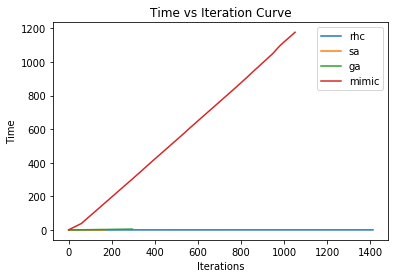

In [139]:
plt.plot(time_curve_rhc, label = 'rhc')
plt.plot(time_curve_sa, label = 'sa')
plt.plot(time_curve_ga, label = 'ga')
plt.plot(time_curve_mimic, label='mimic')
plt.legend()
plt.title("Time vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Time")

Text(0, 0.5, 'Fitness')

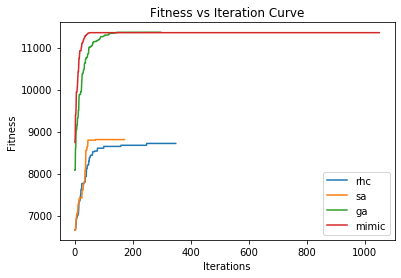

In [140]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()
plt.title("Fitness vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")


Text(0, 0.5, 'Fitness')

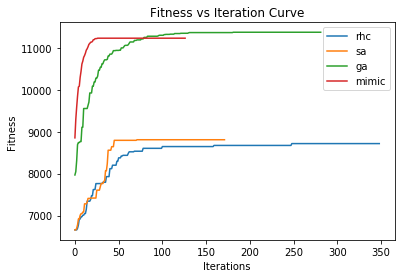

In [130]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()
plt.title("Fitness vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")


Text(0, 0.5, 'Fitness')

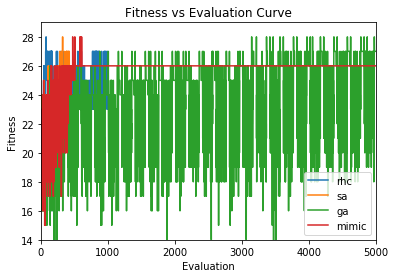

In [55]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_mimic, label = 'mimic')
plt.legend()
plt.axis([0, 5000, 14, 29])
plt.title("Fitness vs Evaluation Curve")
plt.xlabel("Evaluation")
plt.ylabel("Fitness")

In [145]:
np.max(eval_curves_rhc)

8717

Text(0, 0.5, 'Fitness')

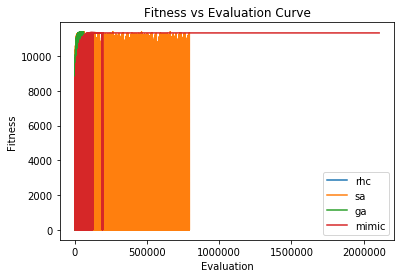

In [142]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_mimic, label = 'mimic')
plt.legend()
plt.axis()
plt.title("Fitness vs Evaluation Curve")
plt.xlabel("Evaluation")
plt.ylabel("Fitness")

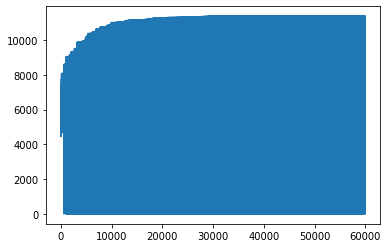

In [146]:
plt.plot(eval_curves_ga, label = 'ga')

In [56]:
### Input 

In [ ]:
import mlrose_hiive as mh
import numpy as np
import random

weights = [random.randint(1,50) for _ in range(50)]
values =  [random.randint(1,50) for _ in range(50)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)
eval_curves = [] 

def eval_sack(state):
    global eval_curves
    
    fitness = sack_fitness.evaluate(state)
    eval_curves.append(fitness)
    return fitness

custom_fitness = mh.CustomFitness(eval_sack)
problem = mh.DiscreteOpt(length=50, fitness_fn=custom_fitness,  max_val=10, maximize=True)
# I did Simulated Annealing here
print(eval_curves)  # came out as 1046

In [152]:
def create_problem(length):
    weights = [random.randint(1,50) for _ in range(length)]
    values =  [random.randint(1,50) for _ in range(length)]
    max_weight_pct = 0.6
    sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)
    #eval_curves = [] 
    
    custom_fitness = mh.CustomFitness(eval_sack)
    problem = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)
    return problem

In [148]:
length_list= [10, 20, 30, 40, 50, 60]

In [57]:
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_4 = mlrose_hiive.DiscreteOpt(length = 4, fitness_fn = fitness_cust, maximize = True, max_val = 10)

fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_8 = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_16 = mlrose_hiive.DiscreteOpt(length = 16, fitness_fn = fitness_cust, maximize = True, max_val = 16)

fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_32 = mlrose_hiive.DiscreteOpt(length = 16, fitness_fn = fitness_cust, maximize = True, max_val = 32)

fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_64 = mlrose_hiive.DiscreteOpt(length = 64, fitness_fn = fitness_cust, maximize = True, max_val = 64)

In [168]:
best_fitness_rhc_list = []
best_time_rhc_list = []

length= 10
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_10 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


eval_curves = [] 
    #best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
    #                                                      max_attempts = 100, max_iters = 1000, curve=True,
    #                                                      init_state = None, random_state = 1)
best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.random_hill_climb(problem_10, restarts = 5, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)

best_fitness_rhc_list.append(best_fitness_rhc)
best_time_rhc_list.append(max(time_curve_rhc))

length= 20
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_20 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.random_hill_climb(problem_20, restarts = 5, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)

best_fitness_rhc_list.append(best_fitness_rhc)
best_time_rhc_list.append(max(time_curve_rhc))




length= 30
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_30 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.random_hill_climb(problem_30, restarts = 5, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)

best_fitness_rhc_list.append(best_fitness_rhc)
best_time_rhc_list.append(max(time_curve_rhc))


length= 40
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_40 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.random_hill_climb(problem_40, restarts = 5, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)

best_fitness_rhc_list.append(best_fitness_rhc)
best_time_rhc_list.append(max(time_curve_rhc))

length= 50
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_50 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.random_hill_climb(problem_50, restarts = 5, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)

best_fitness_rhc_list.append(best_fitness_rhc)
best_time_rhc_list.append(max(time_curve_rhc))

length= 60
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_60 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.random_hill_climb(problem_60, restarts = 5, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)

best_fitness_rhc_list.append(best_fitness_rhc)
best_time_rhc_list.append(max(time_curve_rhc))


In [203]:
best_fitness_ga_list = []
best_time_ga_list = []
max_val_ga_list = []

length= 10
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_10 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


eval_curves = [] 
    #best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
    #                                                      max_attempts = 100, max_iters = 1000, curve=True,
    #                                                      init_state = None, random_state = 1)
best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.genetic_alg(problem_10, pop_size=200, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

best_fitness_ga_list.append(best_fitness_rhc)
best_time_ga_list.append(max(time_curve_rhc))
max_val_ga_list.append(len(eval_curves))

length= 20
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
eval_curves = [] 
custom_fitness = mh.CustomFitness(eval_sack)
problem_20 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.genetic_alg(problem_20, pop_size=200, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

best_fitness_ga_list.append(best_fitness_rhc)
best_time_ga_list.append(max(time_curve_rhc))
max_val_ga_list.append(len(eval_curves))




length= 30
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_30 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.genetic_alg(problem_30, pop_size=200, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)


best_fitness_ga_list.append(best_fitness_rhc)
best_time_ga_list.append(max(time_curve_rhc))
max_val_ga_list.append(len(eval_curves))

length= 40
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_40 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.genetic_alg(problem_40, pop_size=200, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

best_fitness_ga_list.append(best_fitness_rhc)
best_time_ga_list.append(max(time_curve_rhc))
max_val_ga_list.append(len(eval_curves))

length= 50
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_50 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.genetic_alg(problem_50, pop_size=200, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

best_fitness_ga_list.append(best_fitness_rhc)
best_time_ga_list.append(max(time_curve_rhc))
max_val_ga_list.append(len(eval_curves))

length= 60
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_60 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.genetic_alg(problem_60, pop_size=200, pop_breed_percent=0.6, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

best_fitness_ga_list.append(best_fitness_rhc)
best_time_ga_list.append(max(time_curve_rhc))
max_val_ga_list.append(len(eval_curves))


In [204]:
max_val_ga_list

[28153, 42238, 87094, 133375, 188090, 233159]

In [169]:
best_fitness_rhc_list

[1936.0, 3609.0, 4798.0, 5491.0, 8869.0, 9831.0]

In [200]:
best_fitness_ga_list_old = best_fitness_ga_list

In [205]:
best_fitness_ga_list

[2797.0, 3804.0, 6903.0, 8991.0, 11404.0, 13584.0]

In [207]:
best_fitness_ga_list_old

[2263.0, 2801.0, 5992.0, 7512.0, 11060.0, 13237.0]

In [170]:
best_time_rhc_list

[0.06399226188659668,
 0.0609893798828125,
 0.06099820137023926,
 0.07000613212585449,
 0.058999061584472656,
 0.05797839164733887]

In [201]:
best_time_ga_list_old = best_time_ga_list

In [62]:
best_fitness_rhc_list

[6.0, 28.0, 118.0, 120.0, 2001.0]

In [181]:
def sa(p):
    
    best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.simulated_annealing(p, schedule = schedule, 
                                                          max_attempts = 100, max_iters = 1000, curve=True,
                                                          init_state = None, random_state = 42)
    
    return best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc

In [189]:
best_fitness_sa_list = []
best_time_sa_list = []

length= 10
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_10 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


eval_curves = [] 
    #best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
    #                                                      max_attempts = 100, max_iters = 1000, curve=True,
    #                                                      init_state = None, random_state = 1)
best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc =sa(problem_10)

best_fitness_sa_list.append(best_fitness_rhc)
best_time_sa_list.append(max(time_curve_rhc))

length= 20
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_20 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = sa(problem_20)
best_fitness_sa_list.append(best_fitness_rhc)
best_time_sa_list.append(max(time_curve_rhc))




length= 30
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_30 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = sa(problem_30)


best_fitness_sa_list.append(best_fitness_rhc)
best_time_sa_list.append(max(time_curve_rhc))

length= 40
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_40 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc =sa(problem_40)
best_fitness_sa_list.append(best_fitness_rhc)
best_time_sa_list.append(max(time_curve_rhc))

length= 50
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_50 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = sa(problem_50)
best_fitness_sa_list.append(best_fitness_rhc)
best_time_sa_list.append(max(time_curve_rhc))

length= 60
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_60 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = sa(problem_60)

best_fitness_sa_list.append(best_fitness_rhc)
best_time_sa_list.append(max(time_curve_rhc))


In [190]:
best_fitness_sa_list

[1789.0, 3010.0, 5167.0, 5634.0, 7047.0, 8592.0]

In [191]:
def mimic_res(problem):
    best_state, best_fitness_mimic, fitness_curve_mimic, time_curve_mimic = mlrose_hiive.mimic(problem,  pop_size=2000, keep_pct=0.5,
                    max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

    return best_state, best_fitness_mimic, fitness_curve_mimic, time_curve_mimic

In [192]:
best_fitness_mimic_list = []
best_time_mimic_list = []

length= 10
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_10 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


eval_curves = [] 
    #best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
    #                                                      max_attempts = 100, max_iters = 1000, curve=True,
    #                                                      init_state = None, random_state = 1)
best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc =mimic_res(problem_10)

best_fitness_mimic_list.append(best_fitness_rhc)
best_time_mimic_list.append(max(time_curve_rhc))

length= 20
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_20 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mimic_res(problem_20)
best_fitness_mimic_list.append(best_fitness_rhc)
best_time_mimic_list.append(max(time_curve_rhc))




length= 30
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_30 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mimic_res(problem_30)


best_fitness_mimic_list.append(best_fitness_rhc)
best_time_mimic_list.append(max(time_curve_rhc))

length= 40
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_40 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc =mimic_res(problem_40)
best_fitness_mimic_list.append(best_fitness_rhc)
best_time_mimic_list.append(max(time_curve_rhc))

length= 50
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_50 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)

best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mimic_res(problem_50)
best_fitness_mimic_list.append(best_fitness_rhc)
best_time_mimic_list.append(max(time_curve_rhc))

length= 60
weights = [random.randint(1,50) for _ in range(length)]
values =  [random.randint(1,50) for _ in range(length)]
max_weight_pct = 0.6
sack_fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct, max_item_count=10, multiply_by_max_item_count=True)

    
custom_fitness = mh.CustomFitness(eval_sack)
problem_60 = mh.DiscreteOpt(length=length, fitness_fn=custom_fitness,  max_val=10, maximize=True)


best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mimic_res(problem_60)

best_fitness_mimic_list.append(best_fitness_rhc)
best_time_mimic_list.append(max(time_curve_rhc))


In [193]:

best_time_mimic_list

[8.24415636062622,
 27.896953344345093,
 72.53791737556458,
 116.46591544151306,
 149.37194442749023,
 242.25072598457336]

In [194]:
best_fitness_mimic_list

[2305.0, 4304.0, 5641.0, 7615.0, 11305.0, 13386.0]

Text(0, 0.5, 'Fitness')

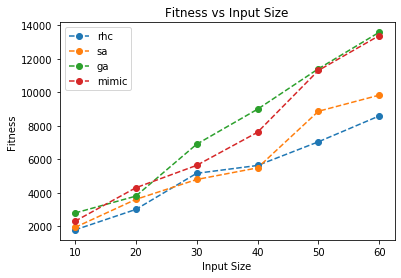

In [304]:
x = [10,20,30,40,50,60]
plt.plot(x, best_fitness_sa_list,ls='--', marker='o',label = 'rhc')
plt.plot(x, best_fitness_rhc_list, ls='--', marker='o',label = 'sa')
plt.plot(x, best_fitness_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, best_fitness_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Fitness vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Fitness")

Text(0, 0.5, 'Time')

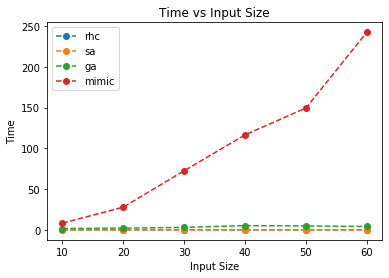

In [198]:
x = [10,20,30,40,50,60]
plt.plot(x, best_time_rhc_list,ls='--', marker='o',label = 'rhc')
plt.plot(x, best_time_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, best_time_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, best_time_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Time vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Time")

In [199]:
best_time_ga_list

[1.6975066661834717,
 2.227083206176758,
 3.0708231925964355,
 5.3280205726623535,
 4.884527921676636,
 4.205460548400879]

# Try to update the code to include fitness vs evaluation curuve 

In [22]:
# test existing curve function 

In [18]:
def queens_max(state):
    
    #initialize global call counter 
    global eval_curves
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1
    eval_curves.append(fitness)

    return fitness

In [19]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 


# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)


best_state, best_fitness, fitness_curve_sa, timve_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = init_state, random_state = 1)

eval_curves_sa = eval_curves

In [20]:
print (len(eval_curves_sa))

698


In [22]:
print (len(timve_curve_sa))

585


In [119]:
eval_curves = [] 
best_state, best_fitness_rhc, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 0, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = init_state, random_state = 1)

eval_curves_rhc = eval_curves

In [154]:
eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga= mlrose_hiive.genetic_alg(problem_cust, pop_size=200, pop_breed_percent=0.75, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.1,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=1)

eval_curves_ga = eval_curves

In [158]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic= mlrose_hiive.mimic(problem_cust,  pop_size=200, keep_pct=0.2,
                max_attempts=20, max_iters=np.inf, curve=True, random_state=1)

eval_curves_mimic = eval_curves

In [ ]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic= mlrose_hiive.mimic(problem_cust,  pop_size=100, keep_pct=0.25,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

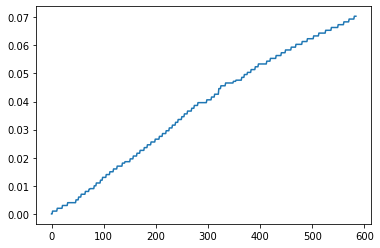

In [23]:
plt.plot(timve_curve_sa, label = 'sa')

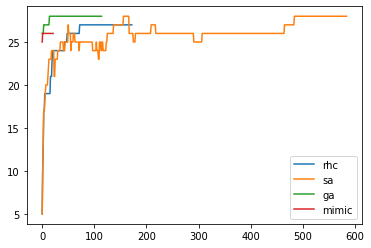

In [159]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()

In [162]:
best_fitness_mimic

26.0

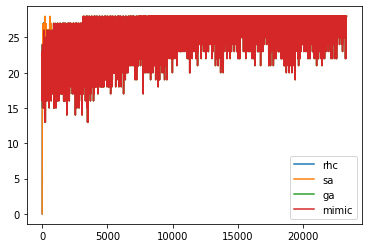

In [161]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_ga, label = 'mimic')
plt.legend()

In [104]:
print (len(eval_curves_sa))

698


In [105]:
len(fitness_curve_sa)

585

### Example 3: Travelling Salesperson Using Coordinate-Defined Fitness Function

In [21]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose_hiive.TravellingSales(coords = coords_list)

In [22]:
# Define optimization problem object
problem_fit = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize = False)

In [23]:
# Solve using genetic algorithm - attempt 1
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit, random_state = 2)

In [24]:
print(best_state)

[1 3 4 5 6 7 0 2]


In [25]:
print(best_fitness)

18.89580466036301


In [26]:
# Solve using genetic algorithm - attempt 2
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit, mutation_prob = 0.2, max_attempts = 100,
                                              random_state = 2)

In [27]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [28]:
print(best_fitness)

17.34261754766733


### Example 4: Travelling Salesperson Using Distance-Defined Fitness Function

In [29]:
# Create list of distances between pairs of cities
dist_list = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), (0, 5, 5.3852),
             (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), (1, 3, 2.8284), (1, 4, 2.0000),
             (1, 5, 4.1231), (1, 6, 4.2426), (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361),
             (2, 5, 4.4721), (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056),
             (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), (4, 7, 2.2361),
             (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

# Initialize fitness function object using dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances = dist_list)

In [30]:
# Define optimization problem object
problem_fit2 = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_dists, maximize = False)

In [31]:
# Solve using genetic algorithm
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit2, mutation_prob = 0.2, max_attempts = 100,
                                              random_state = 2)

In [32]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [33]:
print(best_fitness)

17.3428


### Example 5: Travelling Salesperson Defining Fitness Function as Part of Optimization Problem Definition Step

In [34]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Define optimization problem object
problem_no_fit = mlrose_hiive.TSPOpt(length = 8, coords = coords_list, maximize = False)

In [35]:
# Solve using genetic algorithm
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, max_attempts = 100, 
                                              random_state = 2)

In [36]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [37]:
print(best_fitness)

17.34261754766733


### Example 6: Fitting a Neural Network to the Iris Dataset

In [38]:
# Load the Iris dataset
data = load_iris()

In [39]:
# Get feature values of first observation
print(data.data[0])

[5.1 3.5 1.4 0.2]


In [40]:
# Get feature names
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
# Get target value of first observation
print(data.target[0])

0


In [42]:
# Get target name of first observation
print(data.target_names[data.target[0]])

setosa


In [43]:
# Get minimum feature values
print(np.min(data.data, axis = 0))

[4.3 2.  1.  0.1]


In [44]:
# Get maximum feature values
print(np.max(data.data, axis = 0))

[7.9 4.4 6.9 2.5]


In [45]:
# Get unique target values
print(np.unique(data.target))

[0 1 2]


In [46]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)

In [47]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

C:\Users\ghaye\AppData\Local\conda\conda\envs\mlrose_test\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [49]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

In [50]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.45


In [51]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5333333333333333


In [52]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)

In [53]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.625


In [54]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5666666666666667


### Example 7: Fitting a Logistic Regression to the Iris Data

In [55]:
# Initialize logistic regression object and fit object - attempt 1
lr_model1 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.0001, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100, 
                                      random_state = 3)

lr_model1.fit(X_train_scaled, y_train_hot)

In [56]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [57]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [58]:
# Initialize logistic regression object and fit object - attempt 2

lr_model2 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.01, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100,
                                      random_state = 3)

lr_model2.fit(X_train_scaled, y_train_hot)

In [59]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [60]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7


### Example 8: Fitting a Logistic Regression to the Iris Data using the NeuralNetwork() class

In [61]:
# Initialize neural network object and fit object - attempt 1
lr_nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.0001, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model1.fit(X_train_scaled, y_train_hot)

In [62]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [63]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [64]:
# Initialize neural network object and fit object - attempt 2
lr_nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.01, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model2.fit(X_train_scaled, y_train_hot)

In [65]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [66]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7
